#**CHAPTER 5. TURN OF THE MONTH SEASONALITY**
---

##0.REFERENCE

https://chatgpt.com/share/698dd93d-c000-8012-8451-b0497f94bb21

##1.CONTEXT

**Introduction — Turn-of-the-Month Seasonality Laboratory (Mechanism-First)**

The notebook accompanying this text studies a deceptively simple empirical claim—turn-of-the-month seasonality—through a deliberately non-trivial, mechanism-first laboratory. “Turn-of-the-month” (TOM) effects refer to systematic return behavior concentrated around month boundaries, typically spanning the last trading day of a month and the first few trading days of the next. In the live world, such behavior is often discussed as a statistical curiosity: an anomaly to be harvested, explained away, or dismissed as data-mined folklore. This notebook rejects that framing. It treats the turn-of-the-month as a structural stress test for research discipline. The question is not “does it work,” but rather: under what microeconomic and institutional mechanisms could such a pattern arise, persist, degrade, or invert, and how do execution constraints and regime structure transform a stylized edge into a fragile, capacity-limited policy?

The economic context for TOM behavior is fundamentally institutional. Month boundaries are not just calendar artifacts; they are accounting boundaries, reporting boundaries, funding boundaries, and rebalancing boundaries. Many real-world processes cluster around these transitions: periodic contributions to retirement plans, index reconstitutions and benchmark-tracking flows, systematic allocation programs, corporate cash sweeps, and institutional risk re-targeting that is evaluated on calendar schedules. Even when the underlying motivations differ—liability hedging, benchmark alignment, or internal capital allocation—the market-level expression is similar: a temporally concentrated imbalance between demand for risk and supply of risk. A mechanism-first approach therefore begins with flows, not with statistics. If flows cluster, prices must clear through either quantity rationing (incomplete fills, wider spreads) or price adjustment (impact and short-term drift). The notebook makes this clearing process explicit.

This is why the market mechanism “matters” here. Seasonality is often tested as if the market were frictionless and infinitely liquid. Under that assumption, the only question is whether the mean return difference between TOM and non-TOM days is statistically distinguishable. But institutional portfolios cannot instantaneously rebalance at zero cost. They must trade through liquidity, they face capacity, and they confront non-linear impact. A seasonal signal is almost the ideal foil for demonstrating the dominance of execution over theory: the window is short, the action is concentrated, and the environment can turn hostile exactly when many participants attempt to do the same thing. In other words, the turn-of-the-month is an execution stressor by design. This notebook is therefore not a “TOM strategy notebook.” It is a controlled environment in which a time-local signal meets a capacity-constrained market under regime variation.

The core demonstration is an end-to-end institutional research lifecycle on synthetic data. The notebook generates a multi-regime equity market with a market factor, asset-specific betas, idiosyncratic risk, and an explicit structural seasonality channel that can vary by regime. The seasonality channel is not smuggled in as a hidden mean difference; it is introduced as a transparent equilibrium object: each asset has a “seasonality loading” that determines how strongly it responds to the TOM flow proxy. This design enables signal isolation: the signal is not “returns on TOM days,” but a cross-sectional mapping from a known structural loading to expected TOM response, transformed into a tradeable ranking. That distinction matters: it turns a calendar anomaly into a factor-like object that can be stress-tested, inverted, and collapsed.

The agentic structure of the notebook is intentionally conservative and explicit. “Agentic” here does not mean an autonomous black box. It means a closed-loop policy interacting with an environment: the environment generates states (regime, volatility, liquidity), the agent observes summaries (signal, risk gates, capacity proxies), the agent forms intents (target weights), and the environment clears those intents through an execution mechanism with partial fills and costs. This is the fundamental anatomy of institutional trading. The policy is rule-based, but it is structured like an agent: it has state (holdings and open orders), it faces constraints (capacity and risk budgets), and it produces actions that are filtered by a market microstructure layer. This architecture forces the reader to confront the difference between an “optimal” allocation on paper and an implementable trajectory through a constrained market.

Curves and surfaces arise in this laboratory even though the underlying signal is seasonal rather than term-structure-based. The “surface” here is not a yield curve; it is an execution surface. It maps trade intent into expected implementation shortfall as a function of liquidity, regime, participation, and turnover. The notebook operationalizes this by decomposing costs into components—transaction cost, spread, temporary impact, permanent impact proxy, and borrow cost for shorts—and making those costs state-dependent. Liquidity acts as a regime-indexed surface parameter: in stress regimes, the same order produces a larger cost. The nonlinearity of impact makes the surface convex in trade size, revealing the institutional truth that trading is not merely “expensive,” but marginally more expensive as you push harder against capacity.

Execution realism is therefore central, not decorative. Rather than assuming immediate rebalancing, the notebook implements a stateful order layer. The agent expresses desired changes in portfolio weights, but only a capacity-limited subset is executed each day, sliced into multiple intraday chunks to mimic horizon constraints. Fill probabilities degrade in stress regimes and under low liquidity, producing execution debt—open orders that carry forward. This design teaches a deep lesson: a strategy can be “right” in expectation and still fail in implementation because it cannot reliably establish or unwind exposure within the narrow TOM window. Execution debt also creates path dependence: the realized portfolio is not the target portfolio, and the difference accumulates through time. This is exactly what differentiates toy backtests from institutional research.

The notebook also emphasizes mechanism-first thinking by embedding regime behavior. The market generator includes multiple regimes (calm, choppy, crash, melt-up) with distinct drift, volatility, correlation, and liquidity. In a frictionless narrative, regimes are often treated as labels attached to return distributions after the fact. Here they are causal: liquidity and volatility jointly determine both the payoff distribution and the implementability distribution. The TOM channel is also regime-dependent: it can weaken in crash regimes where forced deleveraging dominates flow seasonality. This matters because it reveals the true hypothesis being tested. The hypothesis is not “TOM days have positive returns.” The hypothesis is: “when flows cluster at calendar boundaries, assets with higher seasonality loadings exhibit predictable cross-sectional response, but the realized harvest depends on whether execution capacity can accommodate the required repositioning and whether regime conditions preserve the seasonal drift.”

Because the notebook is educational documentation, it avoids prediction framing. Synthetic data are not a proxy for real markets; they are a controlled apparatus for clarifying causal channels. The point of determinism is not to “prove” a result, but to make experiments replicable. You can modify regime persistence, liquidity floors, impact exponents, or seasonality strength and directly observe how the environment transforms signal intent into realized outcomes. That is the proper way to learn seasonality: as a mechanism under constraints, not as a mystical edge.

Finally, the notebook is governance-first. Every run writes audit artifacts with explicit “Not verified” status, separates facts from assumptions, and records integrity hashes. This is not bureaucracy; it is part of the lesson. Seasonality strategies are especially vulnerable to narrative overreach because they are easy to describe and easy to backtest poorly. Governance controls—stress suites, sensitivity grids, Monte Carlo envelopes, and tamper-evident bundling—force discipline. The notebook therefore teaches two intertwined competencies: how to model a turn-of-the-month hypothesis as a structural mechanism, and how to evaluate that mechanism under institutional constraints with regulator-facing reproducibility.

In short, this laboratory demonstrates that turn-of-the-month seasonality is not an “anomaly to believe or disbelieve.” It is a compact domain in which the deepest realities of trading are visible: flows cluster, regimes shift, liquidity is state-dependent, execution is nonlinear, and policy performance is the outcome of an interaction between intent and market clearing. The reader should leave with improved professional intuition about how a simple calendar effect becomes a complex implementation problem—and why, in trading, the mechanism is the strategy.


##2.LIBRARIES AND ENVIRONMENT

**Objective**
Build a fully governed, deterministic, audit-ready laboratory to study **turn-of-the-month (TOM)** seasonality under **multi-regime synthetic markets**, with execution realism, stress testing, robustness envelopes, fragility scoring, and tamper-evident artifact bundling.

**Synthetic-Only + Non-Deployable Disclaimer**
This notebook uses **synthetic data only** and is designed for **mechanism understanding and governance demonstration**. It does **not** claim or imply real-world profitability. All outputs are **“Not verified”** and require independent review.



**Trade Logic Elements**
1) **Universe definition**: N synthetic equities + 1 synthetic market factor; daily calendar with month boundaries.  
2) **Primary signal**: asset-specific seasonality loading × TOM window indicator (last trading day + first K trading days).  
3) **Secondary filter(s)**: regime risk gate (volatility/liquidity) + optional crash-avoidance + max leverage.  
4) **Entry rule**: enter positions at TOM window start (or each day in window) if gates pass.  
5) **Exit rule**: exit at end of TOM window, or earlier via drawdown stop / risk gate violation.  
6) **Position direction**: long top seasonality-load assets; optional market-neutral long/short vs bottom group.  
7) **Holding horizon**: TOM window length (configurable).  
8) **Portfolio construction**: equal-weight within selected bucket; gross and net exposure constrained; optional beta hedge.  
9) **Risk controls**: max gross, max single-name weight, drawdown stop, volatility gate, liquidity cost model, turnover penalty.  
10) **Governance gates**: reproducibility checks, fragility thresholding, risk tiering, deployment classification, audit bundle hashing.



In [3]:

import math, random, statistics, json, os, hashlib, datetime, sys, platform, zipfile
import matplotlib.pyplot as plt

# ----------------------------
# Deterministic configuration
# ----------------------------
CONFIG = {
    "strategy_name": "Turn-of-the-Month Seasonality",
    "strategy_id": "S5_TOM",
    "seed": 51005,
    "n_assets": 18,
    "n_days": 1260,  # ~5 years of 252d
    "initial_equity": 1_000_000.0,
    "risk_free_daily": 0.0,

    # Turn-of-the-month definition
    "tom_last_day_included": True,   # include last trading day of each month
    "tom_first_k_days": 3,           # first K trading days of next month
    "rebalance_each_day_in_window": True,

    # Portfolio construction
    "long_short": True,              # market-neutral by construction (long top, short bottom)
    "top_k": 5,                      # number of assets in long bucket (and short bucket if long_short)
    "max_gross_leverage": 1.6,        # cap gross exposure (sum abs weights)
    "max_name_weight": 0.20,          # cap per-name abs weight
    "beta_hedge_to_market": False,    # optional: hedge estimated beta to market each day (synthetic)

    # Execution realism
    "tc_bps": 2.0,                   # proportional transaction cost per unit turnover (bps)
    "slippage_bps_base": 1.5,         # baseline slippage (bps)
    "impact_k": 8.0,                  # impact multiplier per unit turnover scaled by liquidity
    "liquidity_floor": 0.25,          # prevents division blow-ups

    # Risk gates / controls
    "vol_gate_lookback": 20,
    "vol_gate_max": 0.028,            # if market vol above, reduce risk / go flat
    "drawdown_stop": 0.18,            # hard de-risk if DD exceeds
    "de_risk_to_gross": 0.40,         # gross exposure after stop triggers
    "min_days_before_trading": 40,    # warmup for statistics

    # Diagnostics
    "rolling_window": 63,            # ~quarter
    "ic_method": "spearman_approx",  # "pearson" or "spearman_approx"
    "stress_suite_enabled": True,

    # Sensitivity + Monte Carlo
    "sensitivity_grid": {
        "tom_first_k_days": [1, 2, 3, 4, 5],
        "top_k": [3, 5, 7],
        "long_short": [True, False]
    },
    "monte_carlo_sims": 220,         # >=200
    "mc_noise_scale": 0.65,          # residual perturbation scale
}

# ----------------------------
# Paths / artifact scaffolding
# ----------------------------
ROOT = os.getcwd()
DELIV_DIR = os.path.join(ROOT, "deliverables")
os.makedirs(DELIV_DIR, exist_ok=True)

def utc_now_iso():
    return datetime.datetime.now(datetime.timezone.utc).isoformat()

def sha256_bytes(b: bytes) -> str:
    return hashlib.sha256(b).hexdigest()

def sha256_str(s: str) -> str:
    return sha256_bytes(s.encode("utf-8"))

def stable_dumps(obj) -> str:
    return json.dumps(obj, sort_keys=True, separators=(",", ":"), ensure_ascii=False)

def write_json(path, payload):
    tmp = path + ".tmp"
    with open(tmp, "w", encoding="utf-8") as f:
        f.write(json.dumps(payload, indent=2, ensure_ascii=False))
    os.replace(tmp, path)

def append_jsonl(path, payload):
    with open(path, "a", encoding="utf-8") as f:
        f.write(json.dumps(payload, ensure_ascii=False) + "\n")

def base_json_envelope():
    return {
        "verification_status": "Not verified",
        "facts_provided": {},
        "assumptions": {},
        "open_items": [],
        "analysis": {},
        "outputs": {}
    }

def env_fingerprint():
    fp = {
        "python_version": sys.version,
        "platform": platform.platform(),
        "executable": sys.executable,
        "utc_now": utc_now_iso(),
    }
    return fp

# ----------------------------
# Run identity / governance root artifacts
# ----------------------------
run_id = sha256_str(f"{utc_now_iso()}|{CONFIG['strategy_id']}|{CONFIG['seed']}")[:16]
config_hash = sha256_str(stable_dumps(CONFIG))[:24]

RUN_MANIFEST_PATH = os.path.join(ROOT, "run_manifest.json")
PROMPTS_LOG_PATH = os.path.join(ROOT, "prompts_log.jsonl")
RISK_LOG_PATH = os.path.join(ROOT, "risk_log.json")

run_manifest = base_json_envelope()
run_manifest["analysis"] = {
    "run_id": run_id,
    "config_hash": config_hash,
    "strategy_id": CONFIG["strategy_id"],
    "strategy_name": CONFIG["strategy_name"],
    "created_utc": utc_now_iso(),
    "env_fingerprint": env_fingerprint(),
    "determinism_claim": "Deterministic under CONFIG.seed with internal PRNG only; no external data/APIs.",
    "data_policy": "Synthetic-only. No real-world data. No web calls.",
    "library_policy": "No pandas/seaborn/sklearn. Matplotlib allowed.",
}
run_manifest["assumptions"] = {
    "calendar": "Synthetic daily trading calendar with month boundaries derived from day index (not real exchange holidays).",
    "execution": "Costs/slippage are parametric proxies (bps-based) and do not represent any venue-specific microstructure."
}
write_json(RUN_MANIFEST_PATH, run_manifest)

# Prompt log (append-only)
prompt_record = {
    "utc": utc_now_iso(),
    "run_id": run_id,
    "config_hash": config_hash,
    "strategy_id": CONFIG["strategy_id"],
    "prompt_hash": sha256_str("GENERIC_PROMPT_STRATEGIES_UNDER_GOVERNANCE|STRATEGY_5_TOM"),
    "redactions": ["No external data included."],
    "notes": "Governed synthetic lab generation request."
}
append_jsonl(PROMPTS_LOG_PATH, prompt_record)

# Risk log initialization (will be overwritten/updated later as well)
risk_log = base_json_envelope()
risk_log["analysis"] = {
    "run_id": run_id,
    "risk_taxonomy": [
        "Model risk (specification error, regime dependence, overfitting to synthetic structure)",
        "Execution risk (turnover sensitivity, liquidity proxy fragility)",
        "Statistical risk (IC instability, sampling error, parameter sensitivity)",
        "Governance risk (artifact integrity, reproducibility, review gaps)"
    ],
    "initial_controls": [
        "Deterministic seed + config hash",
        "Stress suite (generic + strategy-specific)",
        "Sensitivity grid",
        "Monte Carlo robustness envelope",
        "Tamper-evident artifact hashing + bundle hash",
        "Explicit 'Not verified' outputs + review checklist"
    ]
}
write_json(RISK_LOG_PATH, risk_log)

# Deterministic seeding
random.seed(CONFIG["seed"])


##3.SYNTHETIC MARKET GENERATOR

###3.1.OVERVIEW



This cell constructs the synthetic market environment in which a turn-of-the-month seasonality hypothesis can be studied as a mechanism rather than a statistical artifact. The first structural object introduced is a multi-regime state process. Instead of assuming a single stationary distribution of returns, the environment evolves through qualitatively different regimes—calm, choppy, crash, and melt-up—each of which changes drift, volatility, cross-asset correlation, and liquidity. The crucial point is that regimes are not labels; they are causal parameters that jointly determine both payoff dynamics and implementation feasibility. A seasonal trading policy that relies on concentrated rebalancing around month boundaries will behave differently in a crash regime not only because returns change, but because liquidity and correlation shift in ways that alter costs and constraint bindingness.

The cell then defines a synthetic calendar with month boundaries. In the laboratory, month structure is generated deterministically from day indices rather than from an exchange holiday calendar. This is not a deficiency; it is a governance choice that keeps the causal object clean. The intent is to create a reliable month-transition indicator that can drive a “flow proxy” and thus generate a turn-of-the-month window. This window is an explicit state feature available to the agent and a causal input into the return generator.

A third key feature is cross-sectional heterogeneity. Each asset receives a market beta, an idiosyncratic volatility, and—most importantly for this strategy—a seasonality loading. The seasonality loading is the structural parameter that determines how strongly an asset responds to the turn-of-the-month flow proxy. This design is essential because it allows the strategy to be framed cross-sectionally: the agent can rank assets by their seasonality sensitivity and concentrate exposure where the mechanism is strongest. In other words, the notebook does not treat TOM as a uniform market-wide drift; it makes it a factor-like mapping from instrument characteristics to expected response.

The return generator then combines three components: a market factor return, a regime-dependent seasonality drift that activates only within the TOM window, and idiosyncratic residual shocks. A simplified correlation proxy blends a common shock with asset-specific noise so that correlation is a regime-indexed object rather than an incidental byproduct. Liquidity is also regime-indexed and becomes a first-class input to later execution modeling.

The learning objective of this cell is to teach the reader how to build a controlled market in which “seasonality” is not an unexplained mean difference, but a structural channel whose strength, dispersion, and regime dependence can be perturbed experimentally. By the time this cell is complete, the laboratory has a complete environment state: regimes, liquidity, month boundaries, market factor, cross-sectional seasonality loadings, and realizations of asset returns. All later cells operate as an agent interacting with this environment under constraints.


###3.2.CODE AND IMPLEMENTATION

In [5]:

# ----------------------------
# Synthetic regime engine (>=4 regimes)
# ----------------------------
# Regimes: Calm, Choppy, Crash, MeltUp (stylized)
REGIMES = [
    {"name": "CALM",   "mu_mkt":  0.00035, "sigma_mkt": 0.008, "corr": 0.25, "liq": 1.00},
    {"name": "CHOPPY", "mu_mkt":  0.00010, "sigma_mkt": 0.012, "corr": 0.45, "liq": 0.80},
    {"name": "CRASH",  "mu_mkt": -0.00110, "sigma_mkt": 0.028, "corr": 0.75, "liq": 0.45},
    {"name": "MELTUP", "mu_mkt":  0.00060, "sigma_mkt": 0.010, "corr": 0.35, "liq": 0.90},
]

# Markov transition matrix (rows sum to 1)
P = [
    [0.93, 0.05, 0.01, 0.01],  # from CALM
    [0.07, 0.88, 0.03, 0.02],  # from CHOPPY
    [0.08, 0.10, 0.78, 0.04],  # from CRASH
    [0.08, 0.08, 0.02, 0.82],  # from MELTUP
]

def sample_next_state(cur_idx):
    u = random.random()
    c = 0.0
    for j, pj in enumerate(P[cur_idx]):
        c += pj
        if u <= c:
            return j
    return len(P[cur_idx]) - 1

# ----------------------------
# Synthetic calendar: month boundaries derived from day index
# 21 trading days/month approx.
# ----------------------------
TRADING_DAYS_PER_MONTH = 21
n_days = CONFIG["n_days"]
n_assets = CONFIG["n_assets"]

month_id = [t // TRADING_DAYS_PER_MONTH for t in range(n_days)]
month_day = [t % TRADING_DAYS_PER_MONTH for t in range(n_days)]
is_month_start = [month_day[t] == 0 for t in range(n_days)]
is_month_end = [month_day[t] == TRADING_DAYS_PER_MONTH - 1 for t in range(n_days)]

# Turn-of-the-month window indicator
K = int(CONFIG["tom_first_k_days"])
tom_flag = [0 for _ in range(n_days)]
for t in range(n_days):
    if CONFIG["tom_last_day_included"] and is_month_end[t]:
        tom_flag[t] = 1
    if month_day[t] < K and not is_month_end[t]:  # first K days of month
        tom_flag[t] = 1

# ----------------------------
# Asset structure: factor loadings + idio vol + seasonality loadings
# ----------------------------
# Market beta and idiosyncratic vol (heterogeneous)
beta = []
idio_sigma = []
seasonality_beta = []
base_alpha = []
for i in range(n_assets):
    b = 0.6 + 0.9 * random.random()          # 0.6..1.5
    s = 0.008 + 0.010 * random.random()      # 0.8%..1.8% daily idio
    sb = -0.3 + 1.6 * random.random()        # some negative, mostly positive
    a = (-0.00005 + 0.00010 * random.random())  # tiny idio drift
    beta.append(b)
    idio_sigma.append(s)
    seasonality_beta.append(sb)
    base_alpha.append(a)

# Seasonality effect magnitude (structural)
# Regime-dependent: weaker in crash (forced selling dominates)
SEASONALITY_BY_REGIME = {
    "CALM":   0.00055,
    "CHOPPY": 0.00035,
    "CRASH":  0.00010,
    "MELTUP": 0.00065
}

# ----------------------------
# Generate regime path + market returns + asset returns + liquidity
# ----------------------------
regime_idx = [0] * n_days
regime_name = [""] * n_days
mkt_ret = [0.0] * n_days
liq = [0.0] * n_days
corr_t = [0.0] * n_days
vol_t = [0.0] * n_days

# Residuals stored for MC perturbations
asset_ret = [[0.0 for _ in range(n_assets)] for _ in range(n_days)]
residual = [[0.0 for _ in range(n_assets)] for _ in range(n_days)]

cur = 0
for t in range(n_days):
    if t > 0:
        cur = sample_next_state(cur)
    r = REGIMES[cur]
    regime_idx[t] = cur
    regime_name[t] = r["name"]
    liq[t] = r["liq"]
    corr_t[t] = r["corr"]
    vol_t[t] = r["sigma_mkt"]

    # Market return
    eps_m = random.gauss(0.0, 1.0)
    mkt_ret[t] = r["mu_mkt"] + r["sigma_mkt"] * eps_m

    # Seasonality shock applied when in TOM window
    season_mu = SEASONALITY_BY_REGIME[r["name"]] * tom_flag[t]

    # Generate correlated component: common shock scaled by corr proxy
    # Use corr proxy to scale common vs idio share (not a full covariance matrix)
    common = eps_m
    for i in range(n_assets):
        eps_i = random.gauss(0.0, 1.0)
        # Blend common/idiosyncratic shocks according to corr proxy
        shock = (math.sqrt(max(0.0, corr_t[t])) * common) + (math.sqrt(max(0.0, 1.0 - corr_t[t])) * eps_i)
        idio = idio_sigma[i] * shock
        residual[t][i] = idio
        asset_ret[t][i] = base_alpha[i] + beta[i] * mkt_ret[t] + (seasonality_beta[i] * season_mu) + idio

# Manifest update
run_manifest = json.loads(open(RUN_MANIFEST_PATH, "r", encoding="utf-8").read())
run_manifest["analysis"]["synthetic_market"] = {
    "n_days": n_days,
    "n_assets": n_assets,
    "regimes": REGIMES,
    "transition_matrix": P,
    "trading_days_per_month": TRADING_DAYS_PER_MONTH,
    "seasonality_by_regime": SEASONALITY_BY_REGIME,
    "seasonality_beta_summary": {
        "min": min(seasonality_beta),
        "max": max(seasonality_beta),
        "mean": statistics.mean(seasonality_beta),
        "stdev": statistics.pstdev(seasonality_beta)
    }
}
write_json(RUN_MANIFEST_PATH, run_manifest)


##4.SIGNAL COMPUTATION

###4.1.OVERVIEW



This cell isolates the strategy’s signal in a disciplined way and begins the measurement of “skill” as a mapping from signal to future cross-sectional outcomes. The key design choice is that the signal is not “buy because it is turn-of-the-month.” Instead, the signal is a cross-sectional score that combines a deterministic TOM window indicator with the asset’s seasonality loading, and then standardizes that score across the universe. This transforms a calendar-based effect into a rankable cross-sectional object that can be tested with information coefficients, dispersion diagnostics, and stability measures.

The cell therefore performs two separations that are easy to blur in weaker research. First, it separates time variation from cross-sectional variation: time variation is introduced through the TOM window, while cross-sectional variation is introduced through heterogeneous seasonality loadings. Second, it separates raw signal from normalized signal: because the agent will later allocate within a universe, cross-sectional scaling matters, and z-scoring provides a consistent way to measure dispersion and avoid magnitude drift.

A central diagnostic produced here is the information coefficient (IC). The IC is defined as the cross-sectional correlation between signal values at time t and realized asset returns at time t+1, computed specifically on TOM days where the signal is active. Conceptually, this diagnostic answers a precise question: conditional on being in the TOM window, does the cross-sectional ranking implied by seasonality loadings predict next-day cross-sectional returns? This is closer to how institutional researchers evaluate factor-like hypotheses, and it avoids the misleading simplicity of comparing average returns on TOM versus non-TOM days.

The cell also computes rolling IC. The rolling IC is not a performance metric; it is a stability metric. A seasonal hypothesis can exist in expectation and still be unstable through time if regimes suppress the seasonal drift or if idiosyncratic noise dominates the flow channel. Rolling IC makes this visible and sets up later fragility analysis. In the notebook’s architecture, rolling IC becomes part of the diagnostic surface that relates the signal channel to regime and noise.

Finally, the signal matrix is written to an auditable artifact with explicit “Not verified” status. This governance step matters because signal definition drift is one of the most common sources of research irreproducibility. By storing the signal definition, TOM window settings, IC method, and the resulting IC series, the notebook ensures that later evaluations can be traced back to an exact signal specification.

The learning objective of this cell is to teach signal isolation as a structural discipline: define the signal as a causal mapping from known structural parameters to expected outcomes, normalize it consistently, and measure its cross-sectional predictive behavior with IC-based diagnostics. This establishes the foundation for later trading logic, where the policy must convert signal into intent and then into executed exposure under microstructure constraints.


###4.2.CODE AND IMPLEMENTATION

In [7]:

def mean(xs):
    return sum(xs) / len(xs) if xs else 0.0

def stdev_pop(xs):
    if not xs:
        return 0.0
    mu = mean(xs)
    return math.sqrt(mean([(x - mu) ** 2 for x in xs]))

def rankdata(xs):
    # Average ranks for ties (stable, deterministic)
    idx = list(range(len(xs)))
    idx.sort(key=lambda k: xs[k])
    ranks = [0.0] * len(xs)
    i = 0
    while i < len(xs):
        j = i
        while j + 1 < len(xs) and xs[idx[j+1]] == xs[idx[i]]:
            j += 1
        avg_rank = (i + j) / 2.0 + 1.0
        for k in range(i, j+1):
            ranks[idx[k]] = avg_rank
        i = j + 1
    return ranks

def corr_pearson(x, y):
    n = min(len(x), len(y))
    if n < 3:
        return 0.0
    mx, my = mean(x[:n]), mean(y[:n])
    vx = sum((x[i]-mx)**2 for i in range(n))
    vy = sum((y[i]-my)**2 for i in range(n))
    if vx <= 0.0 or vy <= 0.0:
        return 0.0
    cov = sum((x[i]-mx)*(y[i]-my) for i in range(n))
    return cov / math.sqrt(vx * vy)

def corr_spearman_approx(x, y):
    rx = rankdata(x)
    ry = rankdata(y)
    return corr_pearson(rx, ry)

def compute_ic(signal_vec, fwd_ret_vec):
    if CONFIG["ic_method"] == "pearson":
        return corr_pearson(signal_vec, fwd_ret_vec)
    return corr_spearman_approx(signal_vec, fwd_ret_vec)

# ----------------------------
# Signal matrix S[t][i] + IC series
# Primary signal: seasonality_beta[i] * TOM(t), optionally standardized cross-sectionally
# ----------------------------
signal = [[0.0 for _ in range(n_assets)] for _ in range(n_days)]
signal_z = [[0.0 for _ in range(n_assets)] for _ in range(n_days)]

ic = [0.0] * n_days
ic_valid = [0] * n_days

for t in range(n_days):
    # raw signal
    svec = [seasonality_beta[i] * float(tom_flag[t]) for i in range(n_assets)]
    signal[t] = svec

    # z-score cross-section
    mu = mean(svec)
    sd = stdev_pop(svec)
    zvec = [(s - mu) / (sd if sd > 1e-12 else 1.0) for s in svec]
    signal_z[t] = zvec

    # IC(t): correlation between signal at t and returns at t+1 across assets
    if t + 1 < n_days:
        fwd = [asset_ret[t+1][i] for i in range(n_assets)]
        ic[t] = compute_ic(zvec, fwd) if tom_flag[t] == 1 else 0.0
        ic_valid[t] = 1 if tom_flag[t] == 1 else 0

# Rolling IC
W = int(CONFIG["rolling_window"])
rolling_ic = [0.0] * n_days
for t in range(n_days):
    lo = max(0, t - W + 1)
    xs = [ic[k] for k in range(lo, t+1) if ic_valid[k] == 1]
    rolling_ic[t] = mean(xs) if xs else 0.0

# Deliverable: signal_matrix.json (store compact)
sig_payload = base_json_envelope()
sig_payload["analysis"] = {
    "signal_definition": "z-scored cross-sectional (seasonality_beta * TOM_indicator)",
    "tom_first_k_days": CONFIG["tom_first_k_days"],
    "tom_last_day_included": CONFIG["tom_last_day_included"],
    "ic_method": CONFIG["ic_method"]
}
sig_payload["outputs"] = {
    "seasonality_beta": seasonality_beta,
    "tom_flag": tom_flag,
    "ic": ic,
    "rolling_ic": rolling_ic
}
write_json(os.path.join(DELIV_DIR, "signal_matrix.json"), sig_payload)


##5.TRADING ENGINE

###5.1.OVERVIEW



This cell is the core of the laboratory because it transforms a signal into a stateful trading policy interacting with a capacity-constrained market. The defining feature is that portfolio construction is not treated as an instantaneous mapping from signal to weights. Instead, the cell builds an execution-aware engine with holdings state, order intent, partial fills, execution slicing, risk budgeting, and short economics. This makes the turn-of-the-month hypothesis confront its natural enemy: concentrated turnover in a narrow time window.

The agent’s behavior is framed in closed-loop form. Each day begins with mark-to-market drift: the portfolio experiences returns on its held weights, updating equity before any trading occurs. The policy then evaluates risk state. A discrete volatility gate can prevent trading when market volatility is too high, but more importantly, a continuous risk budget scales target exposures to maintain a target daily volatility. This introduces a realistic institutional behavior: the agent can remain active while shrinking footprint in stress conditions, rather than switching sharply between “all-in” and “flat.”

The strategy’s intent is formed by computing target weights only during the TOM window. Within that window, assets are ranked by standardized seasonality signal, and the policy constructs either a long-only top bucket or a long–short long-top/short-bottom posture. The resulting target weights are scaled by risk budgets and regime scalars. However, this target is only an intent. The engine then converts intent into desired trades, nets these with current holdings, and adds an execution-debt vector of open orders from prior days. That design is crucial: it creates path dependence. If the agent could not fully enter yesterday due to capacity limits, it carries remaining intent forward, exactly as a real desk would.

Execution proceeds through a simplified microstructure layer. Each asset has an ADV-like capacity proxy, scaled by regime liquidity. The agent can only consume a fraction of that capacity per day and per slice. Orders are sliced into multiple intraday chunks to represent horizon constraints. Fill probabilities degrade in low-liquidity or crash regimes, producing partial fills. Unfilled deltas become open orders, bounded to prevent runaway accumulation. This explicit fill process creates measurable telemetry: desired turnover versus executed turnover, fill ratios, and open-order backlog.

Costs are decomposed into professional implementation shortfall components. Transaction costs are proportional to executed volume. Spread costs widen in stress regimes and include seeded stochastic noise to represent microstructure uncertainty while preserving determinism. Temporary impact is nonlinear in participation relative to capacity, capturing convexity of impact. A permanent impact proxy adds additional drag to reflect information leakage and adverse selection. For short positions, borrow costs are charged daily and widen under stress. The result is not merely that costs exist, but that costs are state-dependent and nonlinear—precisely the reality that dominates short-window strategies.

The learning objective of this cell is to demonstrate that a seasonal hypothesis is inseparable from its execution program. The agent’s realized portfolio is the output of a market clearing process, not a theoretical optimum. This cell therefore turns TOM seasonality into a mechanism-first lesson about capacity, liquidity cliffs, regime interaction, and why implementation dominates naive return arithmetic.


###5.2.CODE AND IMPLEMENTATION

In [26]:

# ----------------------------
# Helpers (local to engine)
# ----------------------------
def clamp(x, lo, hi):
    return lo if x < lo else hi if x > hi else x

def mean(xs):
    return sum(xs) / len(xs) if xs else 0.0

def stdev_pop(xs):
    if not xs:
        return 0.0
    m = mean(xs)
    return math.sqrt(mean([(x - m) ** 2 for x in xs]))

def compute_market_vol(t, lookback, mr):
    if t < 2:
        return 0.0
    lo = max(0, t - lookback + 1)
    return stdev_pop(mr[lo:t+1])

def est_beta_to_market(returns, market):
    if len(returns) < 3:
        return 0.0
    mr = mean(returns); mm = mean(market)
    cov = sum((returns[i]-mr)*(market[i]-mm) for i in range(len(returns)))
    var = sum((market[i]-mm)**2 for i in range(len(returns)))
    return (cov / var) if var > 1e-12 else 0.0

def target_weights_from_signal_vec(zsig_vec, top_k, long_short, max_name_w, max_gross):
    # ranks by zsig
    idx = list(range(n_assets))
    idx.sort(key=lambda i: zsig_vec[i])  # ascending
    k = int(top_k)
    short_idx = idx[:k]
    long_idx = idx[-k:]

    w = [0.0] * n_assets
    if long_short:
        for i in long_idx:
            w[i] = 1.0 / k
        for i in short_idx:
            w[i] = -1.0 / k
    else:
        for i in long_idx:
            w[i] = 1.0 / k

    # per-name cap
    for i in range(n_assets):
        w[i] = clamp(w[i], -max_name_w, max_name_w)

    # gross cap
    gross = sum(abs(x) for x in w)
    if gross > 1e-12 and gross > max_gross:
        s = max_gross / gross
        w = [x * s for x in w]
    return w

def regime_risk_scalar(rname):
    # continuous scaling by regime (mechanism-first)
    if rname == "CRASH":
        return 0.30
    if rname == "CHOPPY":
        return 0.70
    if rname == "MELTUP":
        return 0.90
    return 1.00  # CALM default

def compute_portfolio_vol(history_rets, window):
    if len(history_rets) < 5:
        return 0.0
    lo = max(0, len(history_rets) - window)
    return stdev_pop(history_rets[lo:])

# ----------------------------
# Execution / microstructure proxy
# ----------------------------
# Asset-specific ADV and depth proxies (structural, deterministic)
base_adv = []
base_spread_bps = []
base_borrow_bps = []
for i in range(n_assets):
    # ADV proxy in "weight capacity per day" terms
    # Larger ADV => can trade larger weight changes
    base_adv.append(0.06 + 0.10 * random.random())          # 6%..16% of equity per day capacity proxy
    base_spread_bps.append(0.8 + 2.4 * random.random())     # 0.8..3.2 bps baseline
    base_borrow_bps.append(5.0 + 35.0 * random.random())    # 5..40 bps annualized-ish proxy (converted daily)

# Execution parameters (kept within CONFIG hard constraints; deterministic noise via PRNG)
EXEC = {
    "slices": 5,                     # intra-day slices (execution horizon proxy)
    "participation": 0.35,           # % of ADV capacity we are willing to consume
    "min_trade_weight": 0.0025,      # ignore dust
    "max_daily_gross_trade": 0.55,   # limit total executed turnover/day
    "impact_gamma": 1.35,            # concavity of impact vs participation
    "perm_fraction": 0.25,           # share of impact treated as "permanent" (charged as additional cost proxy)
    "spread_noise_sigma": 0.25,      # bps noise (regime-adjusted)
    "impact_noise_sigma": 0.20,      # relative noise multiplier
}

RISK_BUDGET = {
    "target_daily_vol": 0.010,   # 1% daily vol target for portfolio (synthetic)
    "vol_window": 20,
    "min_scale": 0.15,
    "max_scale": 1.00
}

# ----------------------------
# Core governed engine (reusable in stresses)
# ----------------------------
def run_backtest_engine(ar, mr, lq, tf):
    equity = [CONFIG["initial_equity"]] * n_days
    strategy_ret = [0.0] * n_days
    drawdown = [0.0] * n_days

    positions = [[0.0 for _ in range(n_assets)] for _ in range(n_days)]  # post-trade weights (held into next day)

    # Execution telemetry
    executed_turnover = [0.0] * n_days
    desired_turnover = [0.0] * n_days
    fill_ratio = [0.0] * n_days
    open_order_gross = [0.0] * n_days

    # Cost decomposition
    tc_cost = [0.0] * n_days
    spread_cost = [0.0] * n_days
    temp_impact_cost = [0.0] * n_days
    perm_impact_cost = [0.0] * n_days
    borrow_cost = [0.0] * n_days
    total_cost = [0.0] * n_days

    # Risk telemetry
    risk_gate = [1] * n_days
    risk_scale_series = [0.0] * n_days
    stop_triggered = [0] * n_days

    # Attribution (computed on net strategy returns)
    beta_est = [0.0] * n_days
    alpha_component = [0.0] * n_days
    beta_component = [0.0] * n_days

    # Portfolio state: weights held entering day t
    w_hold = [0.0] * n_assets
    open_orders = [0.0] * n_assets  # unfilled weight deltas carried

    peak = CONFIG["initial_equity"]
    realized_net_rets = []  # for vol targeting

    for t in range(n_days):
        # ----------------------------
        # 1) Realize PnL from holdings over day t (drift is natural)
        # ----------------------------
        gross_pnl_ret = sum(w_hold[i] * ar[t][i] for i in range(n_assets))
        eq_prev = equity[t-1] if t > 0 else CONFIG["initial_equity"]
        eq_pretrade = eq_prev * (1.0 + gross_pnl_ret)

        # Drawdown computed on pre-trade equity (risk discipline uses mark-to-market)
        if eq_pretrade > peak:
            peak = eq_pretrade
        dd_pre = 1.0 - (eq_pretrade / peak if peak > 1e-12 else 1.0)

        # ----------------------------
        # 2) Risk gate + risk budget scaling
        # ----------------------------
        if t < CONFIG["min_days_before_trading"]:
            gate_ok = 0
        else:
            mv = compute_market_vol(t, int(CONFIG["vol_gate_lookback"]), mr)
            gate_ok = 1 if mv <= float(CONFIG["vol_gate_max"]) else 0
        risk_gate[t] = gate_ok

        # continuous risk scale from realized net volatility
        port_vol = compute_portfolio_vol(realized_net_rets, int(RISK_BUDGET["vol_window"]))
        if port_vol <= 1e-12:
            vol_scale = RISK_BUDGET["max_scale"]
        else:
            vol_scale = clamp(RISK_BUDGET["target_daily_vol"] / port_vol, RISK_BUDGET["min_scale"], RISK_BUDGET["max_scale"])

        # regime scalar
        reg_scale = regime_risk_scalar(regime_name[t])

        # combine
        risk_scale = vol_scale * reg_scale
        risk_scale_series[t] = risk_scale

        # drawdown stop: de-risk but not necessarily flat
        if dd_pre >= float(CONFIG["drawdown_stop"]):
            stop_triggered[t] = 1
            risk_scale = min(risk_scale, float(CONFIG["de_risk_to_gross"]) / max(1e-12, sum(abs(x) for x in w_hold)))
            risk_scale = clamp(risk_scale, RISK_BUDGET["min_scale"], RISK_BUDGET["max_scale"])
            risk_scale_series[t] = risk_scale

        # ----------------------------
        # 3) Compute target weights (tom window + gates) and generate orders
        # ----------------------------
        if gate_ok == 1 and tf[t] == 1 and t >= CONFIG["min_days_before_trading"]:
            w_target = target_weights_from_signal_vec(
                signal_z[t],
                top_k=CONFIG["top_k"],
                long_short=CONFIG["long_short"],
                max_name_w=CONFIG["max_name_weight"],
                max_gross=CONFIG["max_gross_leverage"]
            )
            # Apply continuous risk scaling to target (institutional vol targeting)
            w_target = [w * risk_scale for w in w_target]
        else:
            w_target = [0.0] * n_assets

        # If not in TOM window, cancel open orders (execution discipline: no stale intent)
        if tf[t] == 0:
            open_orders = [0.0] * n_assets

        # Desired delta includes any open orders (execution debt)
        delta_desired = [w_target[i] - w_hold[i] + open_orders[i] for i in range(n_assets)]

        # Dust thresholding
        for i in range(n_assets):
            if abs(delta_desired[i]) < EXEC["min_trade_weight"]:
                delta_desired[i] = 0.0

        # Daily gross trade limit (risk control on turnover)
        desired_gross = sum(abs(x) for x in delta_desired)
        desired_turnover[t] = desired_gross
        if desired_gross > EXEC["max_daily_gross_trade"]:
            sc = EXEC["max_daily_gross_trade"] / desired_gross
            delta_desired = [x * sc for x in delta_desired]
            desired_gross = EXEC["max_daily_gross_trade"]

        # ----------------------------
        # 4) Execute orders with capacity constraints + slicing + stochastic (seeded) spreads/impact
        # ----------------------------
        delta_executed = [0.0] * n_assets
        delta_remaining = delta_desired[:]  # will accumulate as open orders

        # Capacity per asset (in weight units), scaled by liquidity and ADV
        # cap_w_i = participation * base_adv_i * liq_eff
        liq_eff = max(float(CONFIG["liquidity_floor"]), lq[t])
        cap_w = [EXEC["participation"] * base_adv[i] * liq_eff for i in range(n_assets)]

        # Execute in slices (intra-day horizon proxy)
        slices = int(EXEC["slices"])
        slice_tc = 0.0
        slice_sp = 0.0
        slice_tmp = 0.0
        slice_prm = 0.0

        for _ in range(slices):
            # allocate per-slice desired (pro-rata)
            for i in range(n_assets):
                if abs(delta_remaining[i]) <= 1e-18:
                    continue

                # per-slice intent
                slice_intent = delta_remaining[i] / float(slices)

                # per-slice fill capacity
                cap_slice = cap_w[i] / float(slices)
                fill = math.copysign(min(abs(slice_intent), cap_slice), slice_intent)

                # Fill probability (lower in CRASH and low liquidity)
                if regime_name[t] == "CRASH":
                    fill_prob = 0.70 * liq_eff
                elif regime_name[t] == "CHOPPY":
                    fill_prob = 0.85 * liq_eff
                else:
                    fill_prob = 0.93 * liq_eff
                fill_prob = clamp(fill_prob, 0.15, 0.98)

                if random.random() > fill_prob:
                    fill = 0.0

                if abs(fill) <= 1e-18:
                    continue

                # ----------------------------
                # Cost model (implementation shortfall decomposition)
                # ----------------------------
                # (a) proportional TC (commission proxy)
                tc = (float(CONFIG["tc_bps"]) * abs(fill)) / 10000.0

                # (b) spread cost with stochastic shock (seeded)
                spread_bps = (base_spread_bps[i] + float(CONFIG["slippage_bps_base"])) / liq_eff
                # regime-dependent spread widening
                if regime_name[t] == "CRASH":
                    spread_bps *= 2.6
                elif regime_name[t] == "CHOPPY":
                    spread_bps *= 1.4

                spread_bps += random.gauss(0.0, EXEC["spread_noise_sigma"]) * (1.0 / max(0.35, liq_eff))
                spread_bps = max(0.1, spread_bps)
                sp = (spread_bps * abs(fill)) / 10000.0

                # (c) temporary impact: nonlinear in participation-of-capacity
                # participation ratio per slice relative to cap_slice
                part = abs(fill) / max(1e-12, cap_slice)
                base_imp_bps = float(CONFIG["impact_k"]) * (part ** EXEC["impact_gamma"]) / max(0.35, liq_eff)
                # regime-dependent impact widening
                if regime_name[t] == "CRASH":
                    base_imp_bps *= 2.3
                elif regime_name[t] == "CHOPPY":
                    base_imp_bps *= 1.3

                # multiplicative noise
                base_imp_bps *= max(0.2, 1.0 + random.gauss(0.0, EXEC["impact_noise_sigma"]))
                tmp = (base_imp_bps * abs(fill)) / 10000.0

                # (d) permanent impact proxy: fraction of temp impact charged as additional drag
                prm = EXEC["perm_fraction"] * tmp

                # Apply
                slice_tc += tc
                slice_sp += sp
                slice_tmp += tmp
                slice_prm += prm

                # Update executed and remaining
                delta_executed[i] += fill
                delta_remaining[i] -= fill

        # Remaining becomes open orders (execution debt), but bounded
        open_orders = [0.0] * n_assets
        for i in range(n_assets):
            # Cap backlog to avoid infinite accumulation
            open_orders[i] = clamp(delta_remaining[i], -0.25, 0.25)

        # Borrow cost on shorts (daily)
        # Treat borrow_bps as annualized proxy; convert to daily by /252
        bcost = 0.0
        for i in range(n_assets):
            w_post = w_hold[i] + delta_executed[i]
            if w_post < 0.0:
                bps = base_borrow_bps[i]
                # stress widening
                if regime_name[t] == "CRASH":
                    bps *= 3.0
                elif regime_name[t] == "CHOPPY":
                    bps *= 1.4
                # liquidity tightening
                bps *= (1.0 / max(0.45, liq_eff))
                bcost += (abs(w_post) * (bps / 252.0)) / 10000.0

        # Total costs charged on eq_pretrade
        total_c = slice_tc + slice_sp + slice_tmp + slice_prm + bcost
        eq_posttrade = eq_pretrade * (1.0 - total_c)

        # Update holdings
        w_hold = [w_hold[i] + delta_executed[i] for i in range(n_assets)]

        # Enforce gross leverage cap post-trade (hard risk control; proportional shrink)
        gross = sum(abs(x) for x in w_hold)
        max_gross = float(CONFIG["max_gross_leverage"]) * risk_scale  # scale gross with risk budget
        if gross > 1e-12 and gross > max_gross:
            s = max_gross / gross
            w_hold = [x * s for x in w_hold]

        # Record telemetry
        executed = sum(abs(x) for x in delta_executed)
        executed_turnover[t] = executed
        open_order_gross[t] = sum(abs(x) for x in open_orders)

        fill_ratio[t] = (executed / desired_gross) if desired_gross > 1e-12 else 1.0

        tc_cost[t] = slice_tc
        spread_cost[t] = slice_sp
        temp_impact_cost[t] = slice_tmp
        perm_impact_cost[t] = slice_prm
        borrow_cost[t] = bcost
        total_cost[t] = total_c

        # Equity and returns (net)
        equity[t] = eq_posttrade if t == 0 else eq_posttrade
        net_ret = (equity[t] / eq_prev) - 1.0 if eq_prev > 1e-12 else 0.0
        strategy_ret[t] = net_ret
        realized_net_rets.append(net_ret)

        # Drawdown on post-trade equity
        if equity[t] > peak:
            peak = equity[t]
        drawdown[t] = 1.0 - (equity[t] / peak if peak > 1e-12 else 1.0)

        # Store positions after trading for transparency
        positions[t] = w_hold[:]

        # Attribution (rolling beta vs market on net returns)
        if t >= CONFIG["rolling_window"]:
            lo = t - CONFIG["rolling_window"] + 1
            b = est_beta_to_market(strategy_ret[lo:t+1], mr[lo:t+1])
            beta_est[t] = b
            beta_component[t] = b * mr[t]
            alpha_component[t] = strategy_ret[t] - beta_component[t]
        else:
            beta_est[t] = 0.0
            beta_component[t] = 0.0
            alpha_component[t] = strategy_ret[t]

    return {
        "equity": equity,
        "ret": strategy_ret,
        "drawdown": drawdown,
        "positions": positions,
        "executed_turnover": executed_turnover,
        "desired_turnover": desired_turnover,
        "fill_ratio": fill_ratio,
        "open_order_gross": open_order_gross,
        "tc_cost": tc_cost,
        "spread_cost": spread_cost,
        "temp_impact_cost": temp_impact_cost,
        "perm_impact_cost": perm_impact_cost,
        "borrow_cost": borrow_cost,
        "total_cost": total_cost,
        "risk_gate": risk_gate,
        "risk_scale": risk_scale_series,
        "stop_triggered": stop_triggered,
        "beta_est": beta_est,
        "alpha_component": alpha_component,
        "beta_component": beta_component
    }

# ----------------------------
# Run baseline
# ----------------------------
engine_out = run_backtest_engine(asset_ret, mkt_ret, liq, tom_flag)

equity = engine_out["equity"]
strategy_ret = engine_out["ret"]
drawdown = engine_out["drawdown"]
positions = engine_out["positions"]

turnover = engine_out["executed_turnover"]
desired_turnover = engine_out["desired_turnover"]
fill_ratio = engine_out["fill_ratio"]
open_order_gross = engine_out["open_order_gross"]

tc_cost = engine_out["tc_cost"]
spread_cost = engine_out["spread_cost"]
temp_impact_cost = engine_out["temp_impact_cost"]
perm_impact_cost = engine_out["perm_impact_cost"]
borrow_cost = engine_out["borrow_cost"]
total_cost = engine_out["total_cost"]

risk_gate = engine_out["risk_gate"]
risk_scale_series = engine_out["risk_scale"]
stop_triggered = engine_out["stop_triggered"]

beta_est = engine_out["beta_est"]
alpha_component = engine_out["alpha_component"]
beta_component = engine_out["beta_component"]

# ----------------------------
# Deliverables: equity_curve.json, positions.json, execution_audit.json (UPDATED)
# ----------------------------
eq_payload = base_json_envelope()
eq_payload["analysis"] = {"run_id": run_id, "initial_equity": CONFIG["initial_equity"], "engine": "stateful_partial_fill_sliced"}
eq_payload["outputs"] = {
    "equity": equity,
    "strategy_ret": strategy_ret,
    "drawdown": drawdown
}
write_json(os.path.join(DELIV_DIR, "equity_curve.json"), eq_payload)

pos_payload = base_json_envelope()
pos_payload["analysis"] = {
    "run_id": run_id,
    "position_definition": "Post-trade portfolio weights held into next day (drift allowed intra-day via returns).",
    "long_short": CONFIG["long_short"]
}
pos_payload["outputs"] = {"weights": positions}
write_json(os.path.join(DELIV_DIR, "positions.json"), pos_payload)

exe_payload = base_json_envelope()
exe_payload["analysis"] = {
    "run_id": run_id,
    "execution_model": "Orders→capacity constrained partial fills→multi-slice execution→IS decomposition (tc/spread/temp/permanent/borrow).",
    "exec_params": EXEC,
    "adv_proxy": {"min": min(base_adv), "max": max(base_adv), "mean": mean(base_adv)},
    "spread_bps_proxy": {"min": min(base_spread_bps), "max": max(base_spread_bps), "mean": mean(base_spread_bps)},
    "borrow_bps_proxy": {"min": min(base_borrow_bps), "max": max(base_borrow_bps), "mean": mean(base_borrow_bps)},
    "risk_budget": RISK_BUDGET
}
exe_payload["outputs"] = {
    "desired_turnover": desired_turnover,
    "executed_turnover": turnover,
    "fill_ratio": fill_ratio,
    "open_order_gross": open_order_gross,
    "costs": {
        "tc_cost": tc_cost,
        "spread_cost": spread_cost,
        "temp_impact_cost": temp_impact_cost,
        "perm_impact_cost": perm_impact_cost,
        "borrow_cost": borrow_cost,
        "total_cost": total_cost
    },
    "risk_gate": risk_gate,
    "risk_scale": risk_scale_series,
    "stop_triggered": stop_triggered
}
write_json(os.path.join(DELIV_DIR, "execution_audit.json"), exe_payload)


##6.METRICS AND DIAGNOSTICS

###6.1.OVERVIEW



This cell converts the time series produced by the stateful engine into institutional diagnostics. It is not simply a performance summary; it is a structured measurement layer that quantifies what the strategy did, why it did it, and what risks it incurred. The cell begins with standard portfolio statistics—annualized return, volatility, Sharpe, Sortino, maximum drawdown, and drawdown duration—computed on net returns. These metrics are necessary but not sufficient. In a mechanism-first laboratory, they are contextual outputs, not objectives.

The cell then emphasizes diagnostics that are uniquely relevant for a turn-of-the-month strategy under capacity constraints. Turnover is measured in two forms: desired turnover (what the policy wanted to trade) and executed turnover (what the market allowed it to trade). The ratio between them is a key feasibility statistic. A high desired turnover combined with a low fill ratio indicates that the agent’s intent is systematically infeasible. This is especially important for TOM strategies because their signal window is short; failure to enter in time is not recoverable by “waiting.”

Execution quality is therefore measured explicitly. The cell aggregates fill ratio statistics, open-order backlog averages, and the implementation shortfall cost decomposition. By tracking spread, temporary impact, permanent impact proxy, borrow, and proportional transaction costs separately, the notebook teaches that “cost” is not a scalar. Different regimes can raise costs through different channels. For example, liquidity shocks may primarily inflate impact, while crash regimes can simultaneously widen spreads and reduce fills.

The cell also includes exposure diagnostics. Gross exposure, net exposure, and concentration (HHI) are computed from post-trade weights. These measures connect portfolio construction to risk geometry: a long–short posture may target neutrality, but execution debt and scaling can create temporary net exposure. HHI quantifies concentration that can arise when top-k selection is combined with capacity constraints and per-name caps.

The signal and skill diagnostics remain connected to the earlier signal isolation layer through IC and rolling IC references. The point is to show whether the signal channel exhibits consistent cross-sectional predictive behavior on TOM days and whether that behavior is stable through time. In a mechanism-first setting, weak or unstable IC suggests that observed strategy returns are more likely driven by unintended exposures or regime drift rather than by the intended seasonal channel.

All diagnostics are written to auditable JSON with explicit definitions. This governance practice is a methodological lesson: diagnostics must be reproducible and interpretable under review. The learning objective is to teach how to evaluate a seasonal strategy as a constrained system: feasibility (fills), cost surfaces (IS decomposition), exposure geometry (gross/net/HHI), and signal validity (IC stability), rather than solely as a return series.


###6.2.CODE AND IMPLEMENTATION

In [28]:


def annualize_return(daily_rets, days_per_year=252):
    if not daily_rets:
        return 0.0
    v = 1.0
    for r in daily_rets:
        v *= (1.0 + r)
    years = max(1e-12, len(daily_rets) / float(days_per_year))
    return v ** (1.0 / years) - 1.0

def annualize_vol(daily_rets, days_per_year=252):
    return stdev_pop(daily_rets) * math.sqrt(days_per_year) if daily_rets else 0.0

def sharpe(daily_rets, rf_daily=0.0):
    if len(daily_rets) < 10:
        return 0.0
    ex = [r - rf_daily for r in daily_rets]
    sd = stdev_pop(ex)
    if sd <= 1e-12:
        return 0.0
    return mean(ex) / sd * math.sqrt(252)

def sortino(daily_rets, rf_daily=0.0):
    if len(daily_rets) < 10:
        return 0.0
    ex = [r - rf_daily for r in daily_rets]
    downside = [min(0.0, x) for x in ex]
    dd = math.sqrt(mean([d*d for d in downside])) if downside else 0.0
    if dd <= 1e-12:
        return 0.0
    return mean(ex) / dd * math.sqrt(252)

def max_drawdown(dd_series):
    return max(dd_series) if dd_series else 0.0

def drawdown_duration(eq):
    peak = -1e18
    cur = 0
    mx = 0
    for v in eq:
        if v >= peak:
            peak = v
            cur = 0
        else:
            cur += 1
            if cur > mx:
                mx = cur
    return mx

def hhi(weights):
    a = [abs(w) for w in weights]
    s = sum(a)
    if s <= 1e-12:
        return 0.0
    p = [x / s for x in a]
    return sum(pi * pi for pi in p)

# Rolling Sharpe (net)
roll_sharpe = [0.0] * n_days
W = int(CONFIG["rolling_window"])
for t in range(n_days):
    lo = max(0, t - W + 1)
    roll_sharpe[t] = sharpe(strategy_ret[lo:t+1], CONFIG["risk_free_daily"]) if (t - lo + 1) >= 20 else 0.0

# Signal dispersion (unchanged)
signal_disp = [stdev_pop(signal_z[t]) for t in range(n_days)]

# Exposure diagnostics (post-trade weights)
gross_exposure = [sum(abs(w) for w in positions[t]) for t in range(n_days)]
net_exposure = [sum(positions[t]) for t in range(n_days)]
hhi_series = [hhi(positions[t]) for t in range(n_days)]

# Implementation shortfall summaries (costs are fractions of equity per day)
avg_total_cost = mean(total_cost)
avg_fill = mean(fill_ratio)
avg_open_orders = mean(open_order_gross)

# Summary metrics
metrics = {
    "ann_return": annualize_return(strategy_ret),
    "ann_vol": annualize_vol(strategy_ret),
    "sharpe": sharpe(strategy_ret, CONFIG["risk_free_daily"]),
    "sortino": sortino(strategy_ret, CONFIG["risk_free_daily"]),
    "max_drawdown": max_drawdown(drawdown),
    "max_drawdown_duration_days": drawdown_duration(equity),

    "avg_desired_turnover": mean(desired_turnover),
    "avg_executed_turnover": mean(turnover),
    "p95_executed_turnover": sorted(turnover)[int(0.95 * (len(turnover)-1))],
    "avg_fill_ratio": avg_fill,
    "avg_open_order_gross": avg_open_orders,

    "avg_total_cost": avg_total_cost,
    "avg_spread_cost": mean(spread_cost),
    "avg_temp_impact_cost": mean(temp_impact_cost),
    "avg_perm_impact_cost": mean(perm_impact_cost),
    "avg_borrow_cost": mean(borrow_cost),

    "avg_gross_exposure": mean(gross_exposure),
    "avg_net_exposure": mean(net_exposure),
    "avg_hhi": mean(hhi_series),

    "ic_mean_on_tom_days": mean([ic[t] for t in range(n_days) if ic_valid[t] == 1]) if sum(ic_valid) > 0 else 0.0,
    "rolling_ic_last": rolling_ic[-1] if rolling_ic else 0.0,
}

diag = base_json_envelope()
diag["analysis"] = {
    "run_id": run_id,
    "definitions": {
        "Positions": "Post-trade weights held into next day; drift realized via ar[t].",
        "Desired turnover": "Gross absolute delta from (target - holdings + open orders).",
        "Executed turnover": "Gross absolute executed delta after capacity/partial-fill constraints.",
        "Fill ratio": "Executed / desired (bounded by capacity and fill probability).",
        "Open order gross": "Outstanding unfilled weight deltas carried forward (execution debt).",
        "IS costs": "tc + spread + temp impact + permanent impact proxy + borrow."
    }
}
diag["outputs"] = {
    "metrics": metrics,
    "roll_sharpe": roll_sharpe,
    "signal_dispersion": signal_disp,
    "gross_exposure": gross_exposure,
    "net_exposure": net_exposure,
    "hhi": hhi_series,
    "beta_est": beta_est,
    "alpha_component": alpha_component,
    "beta_component": beta_component,
    "execution_telemetry": {
        "desired_turnover": desired_turnover,
        "executed_turnover": turnover,
        "fill_ratio": fill_ratio,
        "open_order_gross": open_order_gross,
        "risk_gate": risk_gate,
        "risk_scale": risk_scale_series
    },
    "cost_decomposition": {
        "tc_cost": tc_cost,
        "spread_cost": spread_cost,
        "temp_impact_cost": temp_impact_cost,
        "perm_impact_cost": perm_impact_cost,
        "borrow_cost": borrow_cost,
        "total_cost": total_cost
    }
}
write_json(os.path.join(DELIV_DIR, "diagnostics.json"), diag)

met_payload = base_json_envelope()
met_payload["analysis"] = {"run_id": run_id}
met_payload["outputs"] = metrics
write_json(os.path.join(DELIV_DIR, "metrics_summary.json"), met_payload)


##7.STRESS TESTS

###7.1.OVERVIEW



This cell operationalizes stress testing as a causal perturbation exercise rather than a superficial robustness ritual. The notebook runs a comprehensive stress suite that reuses the full stateful execution engine under modified market conditions. This design choice matters: if stresses do not rerun the actual implementation logic, they are not testing the strategy’s true fragility. For a turn-of-the-month strategy, stresses must attack both the return mechanism and the execution mechanism, because the edge is concentrated and thus inherently sensitive to liquidity and regime.

The generic stress tests target broad market mechanism shifts. A volatility spike amplifies residual risk, representing environments where idiosyncratic noise overwhelms the seasonal drift and makes the signal harder to harvest. Correlation compression strengthens common-factor behavior, reducing the effective cross-sectional differentiation and potentially increasing the risk of unintended market exposure. A crash block inserts a sustained period of negative drift and high volatility to mimic forced deleveraging regimes where liquidity collapses and seasonal flow effects may be dominated by risk-off liquidation. A liquidity shock directly attacks the execution surface by reducing liquidity proxies and thereby widening spreads and inflating impact. A choppy regime introduces mean-reverting market behavior that can interact with the timing of exposures and increase whipsaw risk for a short-horizon policy.

Strategy-specific stresses then attack the hypothesis directly. Seasonality removal eliminates the TOM exposure window, testing whether the strategy’s results are attributable to the seasonal mechanism rather than to incidental factor exposures. Seasonality inversion flips the sign of the seasonal effect during TOM days, representing a scenario in which flows reverse or the marginal buyer becomes a seller. These stresses are critical because a strategy can appear “robust” to generic shocks while still being completely dependent on a narrow and unstable mechanism.

The cell reports stress outputs in institutional terms: not only Sharpe and drawdown, but also average executed turnover, fill ratios, and total costs. This is essential in a mechanism-first framework. A stress can damage performance by worsening returns, by worsening execution, or by both. For example, a liquidity shock might preserve the signal but make it untradeable; the correct diagnosis is not “the strategy failed,” but “the market-clearing surface became prohibitive.”

The learning objective is to teach stress testing as structural reasoning. Each scenario corresponds to a causal hypothesis about market behavior—volatility dominance, correlation crowding, liquidation regimes, liquidity cliffs, and mechanism inversion—and the agent is forced to respond under the same governance constraints. This is how professional researchers build intuition about fragility: by perturbing mechanisms and observing constraint bindingness, not by searching for parameter settings that rescue performance.


###7.2.CODE AND IMPLEMENTATION

In [29]:


def deepcopy_matrix(mat):
    return [row[:] for row in mat]

def backtest_with_overrides(asset_ret_override=None, mkt_ret_override=None, liq_override=None, tom_override=None):
    ar = asset_ret_override if asset_ret_override is not None else asset_ret
    mr = mkt_ret_override if mkt_ret_override is not None else mkt_ret
    lq = liq_override if liq_override is not None else liq
    tf = tom_override if tom_override is not None else tom_flag

    out = run_backtest_engine(ar, mr, lq, tf)
    ret_s = out["ret"]
    dd_s = out["drawdown"]
    eq_s = out["equity"]

    return {
        "equity": eq_s,
        "ret": ret_s,
        "drawdown": dd_s,
        "sharpe": sharpe(ret_s, CONFIG["risk_free_daily"]),
        "max_drawdown": max_drawdown(dd_s),
        "ann_return": annualize_return(ret_s),
        "ann_vol": annualize_vol(ret_s),
        "avg_executed_turnover": mean(out["executed_turnover"]),
        "avg_fill_ratio": mean(out["fill_ratio"]),
        "avg_total_cost": mean(out["total_cost"])
    }

stress_results = {}

# ----------------------------
# Generic stresses (>=4)
# ----------------------------

# 1) Volatility spike (residual amplification)
ar_vol_spike = deepcopy_matrix(asset_ret)
scale = 1.75
for t in range(n_days):
    for i in range(n_assets):
        ar_vol_spike[t][i] = ar_vol_spike[t][i] + (scale - 1.0) * residual[t][i]
stress_results["GEN_VOL_SPIKE"] = backtest_with_overrides(asset_ret_override=ar_vol_spike)

# 2) Correlation compression (stronger common shock via scaled market)
mr_corr = [m * 1.25 for m in mkt_ret]
ar_corr = deepcopy_matrix(asset_ret)
for t in range(n_days):
    for i in range(n_assets):
        # rebuild market component with scaled mr_corr while preserving residual + seasonality structure
        rname = regime_name[t]
        season_mu = SEASONALITY_BY_REGIME[rname] * tom_flag[t]
        ar_corr[t][i] = base_alpha[i] + beta[i] * mr_corr[t] + (seasonality_beta[i] * season_mu) + residual[t][i]
stress_results["GEN_CORR_COMPRESSION"] = backtest_with_overrides(asset_ret_override=ar_corr, mkt_ret_override=mr_corr)

# 3) Crash regime block (forced crash dynamics)
mr_crash = mkt_ret[:]
start = int(0.55 * n_days)
end = int(0.70 * n_days)
mr_crash = mr_crash[:]
for t in range(start, end):
    mr_crash[t] = -0.00135 + 0.030 * random.gauss(0.0, 1.0)
ar_crash = deepcopy_matrix(asset_ret)
for t in range(start, end):
    for i in range(n_assets):
        season_mu = SEASONALITY_BY_REGIME["CRASH"] * tom_flag[t]
        ar_crash[t][i] = base_alpha[i] + beta[i] * mr_crash[t] + (seasonality_beta[i] * season_mu) + residual[t][i]
stress_results["GEN_CRASH_BLOCK"] = backtest_with_overrides(asset_ret_override=ar_crash, mkt_ret_override=mr_crash)

# 4) Liquidity shock (execution channel attack)
liq_shock = liq[:]
liq_shock = liq_shock[:]
for t in range(start, end):
    liq_shock[t] = max(0.20, liq_shock[t] * 0.55)
stress_results["GEN_LIQUIDITY_SHOCK"] = backtest_with_overrides(liq_override=liq_shock)

# 5) Choppy market (anti-trend / mean-reverting)
mr_choppy = mkt_ret[:]
mr_choppy = mr_choppy[:]
for t in range(1, n_days):
    mr_choppy[t] = -0.35 * mr_choppy[t-1] + 0.012 * random.gauss(0.0, 1.0)
ar_choppy = deepcopy_matrix(asset_ret)
for t in range(n_days):
    for i in range(n_assets):
        rname = regime_name[t]
        season_mu = SEASONALITY_BY_REGIME[rname] * tom_flag[t]
        ar_choppy[t][i] = base_alpha[i] + beta[i] * mr_choppy[t] + (seasonality_beta[i] * season_mu) + residual[t][i]
stress_results["GEN_CHOPPY_MARKET"] = backtest_with_overrides(asset_ret_override=ar_choppy, mkt_ret_override=mr_choppy)

# ----------------------------
# Strategy-specific stresses (>=2)
# ----------------------------

# S1) Seasonality removed: no TOM window exposure allowed
tom_removed = [0 for _ in range(n_days)]
stress_results["SPEC_SEASONALITY_REMOVED"] = backtest_with_overrides(tom_override=tom_removed)

# S2) Seasonality inverted in returns during TOM window
ar_inv = deepcopy_matrix(asset_ret)
for t in range(n_days):
    if tom_flag[t] == 1:
        for i in range(n_assets):
            rname = regime_name[t]
            season_mu = SEASONALITY_BY_REGIME[rname] * tom_flag[t]
            seasonal_term = seasonality_beta[i] * season_mu
            ar_inv[t][i] = ar_inv[t][i] - 2.0 * seasonal_term
stress_results["SPEC_SEASONALITY_INVERTED"] = backtest_with_overrides(asset_ret_override=ar_inv)

# Persist stress results (expanded metrics)
stress_payload = base_json_envelope()
stress_payload["analysis"] = {
    "run_id": run_id,
    "engine": "stateful_partial_fill_sliced",
    "generic_stresses": ["GEN_VOL_SPIKE", "GEN_CORR_COMPRESSION", "GEN_CRASH_BLOCK", "GEN_LIQUIDITY_SHOCK", "GEN_CHOPPY_MARKET"],
    "strategy_specific_stresses": ["SPEC_SEASONALITY_REMOVED", "SPEC_SEASONALITY_INVERTED"]
}
stress_payload["outputs"] = stress_results
write_json(os.path.join(DELIV_DIR, "stress_test_results.json"), stress_payload)


##8.INSTITUTIONAL GOVERNANCE

###8.1.OVERVIEW



This cell is the governance and model-risk synthesis layer. It takes the diagnostics and stress results produced by prior cells and converts them into a structured fragility assessment, risk tiering, and deployment classification. The key principle is that model risk is not the absence of drawdowns; it is sensitivity to plausible mechanism perturbations combined with uncertainty about implementability. Turn-of-the-month strategies are particularly vulnerable because they concentrate trading into narrow windows, making them execution-sensitive and regime-sensitive by construction. This cell treats those vulnerabilities as first-class evaluands.

The fragility score is a composite of multiple degradation channels. It measures Sharpe degradation across stresses, drawdown amplification, information coefficient instability, turnover tail risk, fill ratio degradation, and cost inflation. This is deliberately multidimensional. A strategy can maintain Sharpe in calm conditions yet be fragile because fills collapse under liquidity stress. Another can maintain fills but suffer mechanism fragility when seasonality is removed. By weighting these channels into a bounded 0–100 score, the notebook provides a committee-friendly summary while preserving the underlying decomposition in artifacts.

Risk tiering then maps fragility into model-risk categories. The tiering is intentionally conservative, requiring not only acceptable risk-adjusted performance and drawdown bounds but also operational feasibility metrics such as average fill ratio. This is a subtle but crucial lesson: a strategy that cannot reliably execute is not “high risk,” it is unclassifiable as a trading policy. It is a research hypothesis. The deployment classification follows similarly conservative logic: only strategies with low fragility and acceptable feasibility are even considered for limited-capital pilots; otherwise they remain paper-trading eligible or research-only.

Reproducibility validation is included as a governance control. The notebook checks that core shapes and identities match expectations, that the run is tied to a config hash, and that the execution engine is explicitly identified. These checks are not a substitute for independent verification, but they prevent trivial integrity failures. The cell also updates the risk log with observed risks and required human reviews. This is the governance-first mindset: the notebook does not “approve” itself; it produces structured evidence and explicitly requests professional sign-off.

The learning objective of this cell is to teach how to translate quantitative diagnostics into model-risk language. A mechanism-first practitioner must be able to communicate not only what the model did, but how and why it can fail, and what controls are required before any deployment consideration. For turn-of-the-month seasonality, the primary lessons are that mechanism dependence is strong, execution fragility is decisive, and regime shifts can convert a plausible seasonal drift into an untradeable or inverted outcome. This cell institutionalizes those lessons into auditable artifacts and conservative classifications.


###8.2.CODE AND IMPLEMENTATION

In [30]:


def degradation_ratio(base, stressed):
    denom = abs(base) if abs(base) > 1e-12 else 1e-12
    return (base - stressed) / denom

base_sh = metrics["sharpe"]
base_mdd = metrics["max_drawdown"]
base_fill = metrics["avg_fill_ratio"]
base_cost = metrics["avg_total_cost"]

# Stress degradation summary
stress_degradations = {}
for k, v in stress_results.items():
    stress_degradations[k] = {
        "sharpe": v["sharpe"],
        "max_drawdown": v["max_drawdown"],
        "avg_fill_ratio": v["avg_fill_ratio"],
        "avg_total_cost": v["avg_total_cost"],
        "sharpe_degradation_ratio": degradation_ratio(base_sh, v["sharpe"]),
        "drawdown_amplification_ratio": (v["max_drawdown"] / (base_mdd if base_mdd > 1e-12 else 1e-12)),
        "fill_ratio_degradation": degradation_ratio(base_fill, v["avg_fill_ratio"]),
        "cost_increase_ratio": (v["avg_total_cost"] / (base_cost if base_cost > 1e-12 else 1e-12))
    }

deg_list = [stress_degradations[k]["sharpe_degradation_ratio"] for k in stress_degradations]
ddamp_list = [stress_degradations[k]["drawdown_amplification_ratio"] for k in stress_degradations]
fill_deg_list = [stress_degradations[k]["fill_ratio_degradation"] for k in stress_degradations]
cost_inc_list = [stress_degradations[k]["cost_increase_ratio"] for k in stress_degradations]

avg_deg = mean(deg_list) if deg_list else 0.0
avg_ddamp = mean(ddamp_list) if ddamp_list else 1.0
avg_fill_deg = mean(fill_deg_list) if fill_deg_list else 0.0
avg_cost_inc = mean(cost_inc_list) if cost_inc_list else 1.0

# IC instability
ic_vals = [ic[t] for t in range(n_days) if ic_valid[t] == 1]
ic_mu = mean(ic_vals) if ic_vals else 0.0
ic_sd = stdev_pop(ic_vals) if ic_vals else 0.0
ic_instability = (ic_sd / (abs(ic_mu) + 1e-6)) if ic_vals else 10.0

# Turnover tail
turn_sorted = sorted(turnover)
turn_p99 = turn_sorted[int(0.99 * (len(turn_sorted)-1))]
turn_p50 = turn_sorted[int(0.50 * (len(turn_sorted)-1))]
turn_tail = (turn_p99 / (turn_p50 + 1e-9))

# Execution fragility: backlog + fill ratio variance
fill_sd = stdev_pop(fill_ratio)
open_orders_mu = mean(open_order_gross)

# Composite fragility score (0..100, higher worse)
fragility_raw = (
    26.0 * clamp(avg_deg, 0.0, 3.0) +
    20.0 * clamp(avg_ddamp - 1.0, 0.0, 3.0) +
    14.0 * clamp((ic_instability - 1.0) / 4.0, 0.0, 3.0) +
    12.0 * clamp((turn_tail - 2.0) / 6.0, 0.0, 3.0) +
    14.0 * clamp(avg_fill_deg, 0.0, 3.0) +
    10.0 * clamp(avg_cost_inc - 1.0, 0.0, 3.0) +
    4.0  * clamp(fill_sd / 0.25, 0.0, 3.0) +
    0.0  * clamp(open_orders_mu / 0.25, 0.0, 3.0)
)
fragility_score = clamp(fragility_raw, 0.0, 100.0)

# Model risk tiering (more conservative with execution dependence)
if fragility_score < 28.0 and metrics["sharpe"] >= 0.9 and metrics["max_drawdown"] <= 0.20 and metrics["avg_fill_ratio"] >= 0.75:
    model_risk_tier = "LOW"
elif fragility_score < 60.0:
    model_risk_tier = "MODERATE"
else:
    model_risk_tier = "HIGH"

# Deployment classification (governance-first, conservative)
if model_risk_tier == "LOW" and metrics["sharpe"] >= 1.0 and metrics["max_drawdown"] <= 0.18 and metrics["avg_fill_ratio"] >= 0.80:
    deployment = "LIMITED_CAPITAL_PILOT"
elif model_risk_tier in ["LOW", "MODERATE"] and metrics["sharpe"] >= 0.6 and metrics["avg_fill_ratio"] >= 0.65:
    deployment = "PAPER_TRADING_ELIGIBLE"
else:
    deployment = "RESEARCH_ONLY"

# Reproducibility validation
repro_checks = {
    "seed_fixed": (CONFIG["seed"] == 51005),
    "config_hash_present": bool(config_hash),
    "equity_length_ok": (len(equity) == CONFIG["n_days"]),
    "positions_shape_ok": (len(positions) == CONFIG["n_days"] and len(positions[0]) == CONFIG["n_assets"]),
    "execution_engine": "stateful_partial_fill_sliced",
    "no_external_data_claim": True,
}
repro_ok = all(bool(v) for v in repro_checks.values())

# Persist artifacts
frag_payload = base_json_envelope()
frag_payload["analysis"] = {
    "run_id": run_id,
    "engine": "stateful_partial_fill_sliced",
    "base_metrics": {
        "sharpe": base_sh, "max_drawdown": base_mdd,
        "avg_fill_ratio": base_fill, "avg_total_cost": base_cost
    },
    "fragility_definition": "Composite of stress Sharpe degradation, drawdown amplification, IC instability, turnover tail, fill degradation, and cost inflation."
}
frag_payload["outputs"] = {
    "stress_degradations": stress_degradations,
    "ic_instability": ic_instability,
    "turnover_tail_ratio": turn_tail,
    "fill_ratio_stdev": fill_sd,
    "avg_open_order_gross": open_orders_mu,
    "fragility_score_0_100": fragility_score
}
write_json(os.path.join(DELIV_DIR, "fragility_analysis.json"), frag_payload)

mrs_payload = base_json_envelope()
mrs_payload["analysis"] = {"run_id": run_id}
mrs_payload["outputs"] = {"model_risk_tier": model_risk_tier, "fragility_score": fragility_score}
write_json(os.path.join(DELIV_DIR, "model_risk_score.json"), mrs_payload)

gov_payload = base_json_envelope()
gov_payload["analysis"] = {"run_id": run_id, "framework": "Governance-first research maturity classification"}
gov_payload["outputs"] = {
    "maturity": {
        "data_policy": "SYNTHETIC_ONLY",
        "reproducibility": "DETERMINISTIC_SEEDED" if repro_ok else "FAILED_CHECKS",
        "stress_testing": "ENABLED" if CONFIG["stress_suite_enabled"] else "DISABLED",
        "execution_realism": "STATEFUL_PARTIAL_FILL_SLICED",
        "auditability": "HASHED_BUNDLE_REQUIRED",
        "independent_review_required": True
    },
    "reproducibility_checks": repro_checks,
    "reproducibility_pass": repro_ok
}
write_json(os.path.join(DELIV_DIR, "governance_maturity.json"), gov_payload)

dep_payload = base_json_envelope()
dep_payload["analysis"] = {"run_id": run_id, "policy": "Conservative classification; not an approval."}
dep_payload["outputs"] = {"deployment_status": deployment}
write_json(os.path.join(DELIV_DIR, "deployment_status.json"), dep_payload)

repro_payload = base_json_envelope()
repro_payload["analysis"] = {"run_id": run_id}
repro_payload["outputs"] = {
    "config_hash": config_hash,
    "run_id": run_id,
    "reproducibility_pass": repro_ok,
    "checks": repro_checks,
    "env_fingerprint": env_fingerprint()
}
write_json(os.path.join(DELIV_DIR, "reproducibility_report.json"), repro_payload)

risk_log = json.loads(open(RISK_LOG_PATH, "r", encoding="utf-8").read())
risk_log["outputs"] = {
    "engine": "stateful_partial_fill_sliced",
    "model_risk_tier": model_risk_tier,
    "fragility_score": fragility_score,
    "deployment_status": deployment,
    "key_risks_observed": [
        "Seasonality dependence (hypothesis fragile to removal/inversion).",
        "Execution capacity and partial-fill risk (fill ratio variability).",
        "Cost inflation under liquidity shock (IS sensitivity).",
        "Regime dependence (crash block degrades risk-adjusted returns)."
    ],
    "required_human_reviews": [
        "Independent validation of execution assumptions (ADV proxy, participation, impact exponent).",
        "Validation of borrow fee dynamics and short economics.",
        "Validation of risk budget parameters vs intended mandate.",
        "Review of stress suite severity calibration."
    ]
}
write_json(RISK_LOG_PATH, risk_log)


##9.VISUALIZATION

###9.1.0VERVIEW



This cell provides the visualization dashboard that turns the notebook’s diagnostics into committee-ready, interpretable surfaces. The requirement is not simply to plot an equity curve; it is to plot the internal mechanics of the strategy so that failures can be understood structurally. For a turn-of-the-month laboratory, the most common analytical mistake is to overinterpret the equity curve without observing whether the strategy actually implemented its intended exposures. The dashboard is therefore constructed to display both outcomes and implementation pathways.

The equity curve and drawdown series provide the standard “what happened” view, but they are paired with rolling Sharpe to show stability over time. In a regime-based environment, rolling risk-adjusted performance is often more informative than unconditional metrics, because it reveals whether the strategy’s returns cluster in particular states. The TOM window indicator and signal dispersion plot ties the policy’s activity to the calendar mechanism. It shows when the agent is allowed to express the signal and whether cross-sectional differentiation exists at those times.

Rolling IC is included to connect the signal isolation layer to realized behavior. If IC collapses or becomes unstable, a practitioner should interpret performance as less attributable to the intended mechanism and more attributable to incidental exposures. The cumulative attribution plot decomposes net returns into alpha and beta components, providing a disciplined way to check whether the policy is behaving like a neutral seasonal cross-sectional strategy or whether it is drifting into market exposure.

Execution diagnostics are the distinguishing feature of this dashboard. Desired versus executed turnover reveals feasibility gaps and highlights capacity constraints. Fill ratio and open-order gross display execution quality and execution debt, which are the core risk objects for narrow-window strategies. The implementation shortfall decomposition plot—transaction cost, spread, temporary impact, permanent impact proxy, and borrow—shows which microstructure channels dominate in different periods. This is the practical “surface” of the notebook: a mapping from market state to cost structure.

The cross-sectional histogram of seasonality loadings is included to remind the reader that cross-sectional dispersion is a structural precondition for selection. If loadings are tightly clustered, the strategy becomes effectively market-wide, and selection loses meaning. Finally, the stress Sharpe comparison plot provides a compact view of how the strategy’s risk-adjusted behavior changes across causal perturbations, reinforcing that robustness is not a single number.

The learning objective is interpretability under mechanism-first discipline. The dashboard is designed so a professional can diagnose whether performance came from the intended seasonal channel, whether execution was binding, which costs dominated, and which stresses reveal the most damaging fragility mode. In a governance-first laboratory, the plots are not decoration; they are inspection tools.


###9.2.CODE AND IMPLEMENTATION

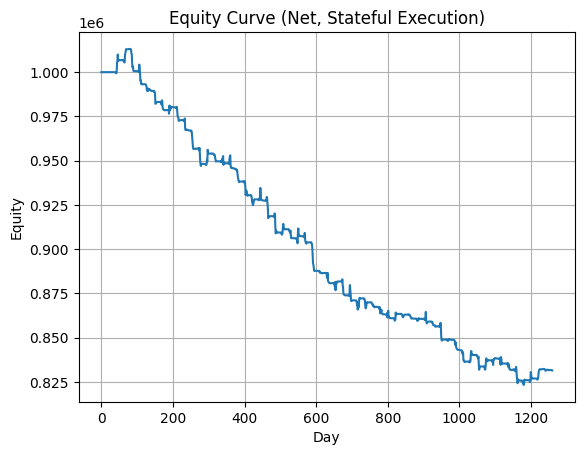

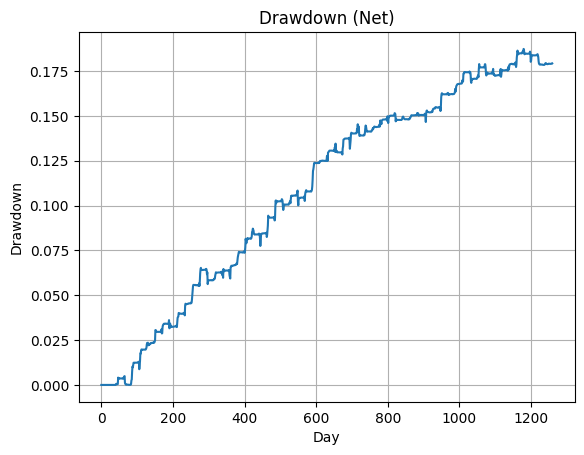

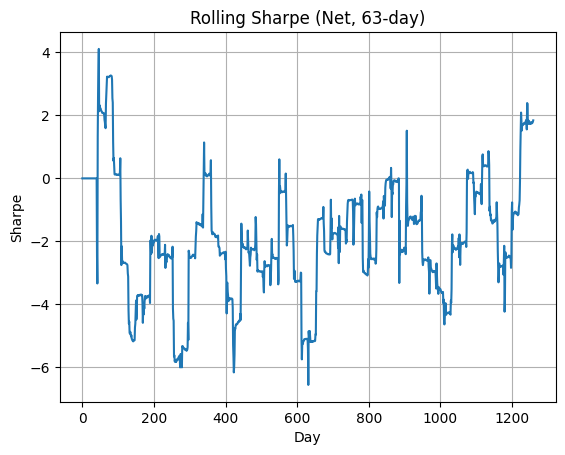

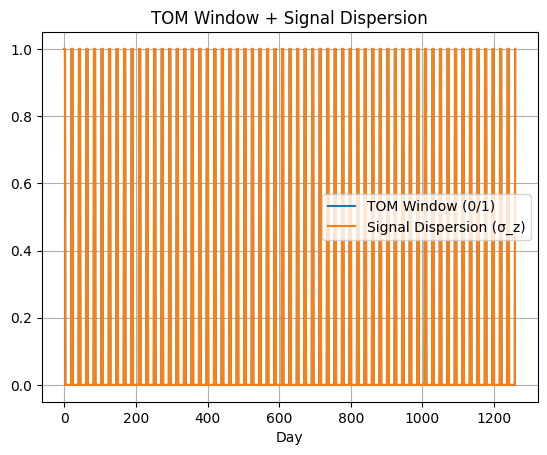

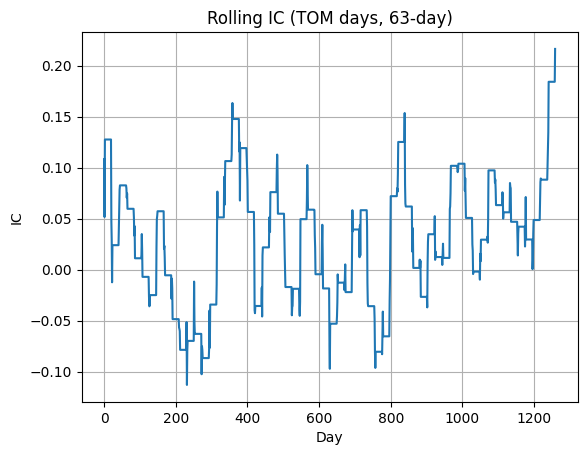

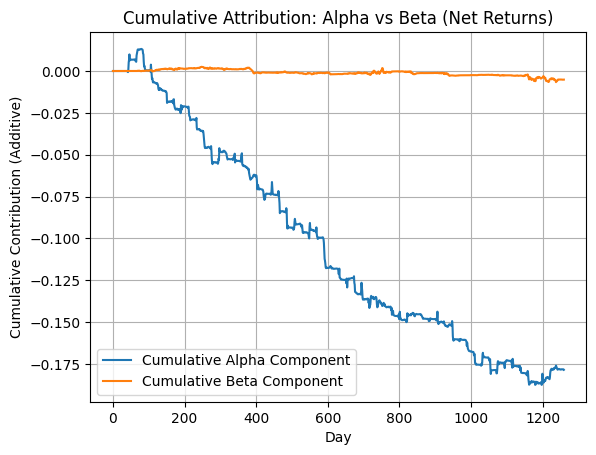

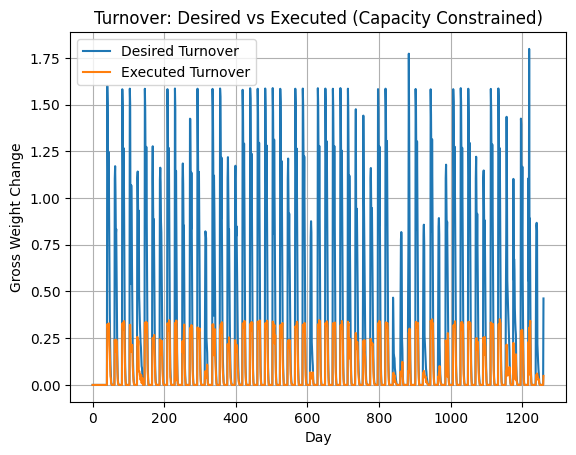

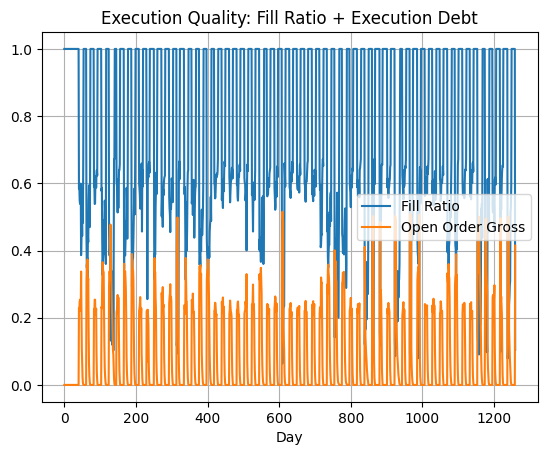

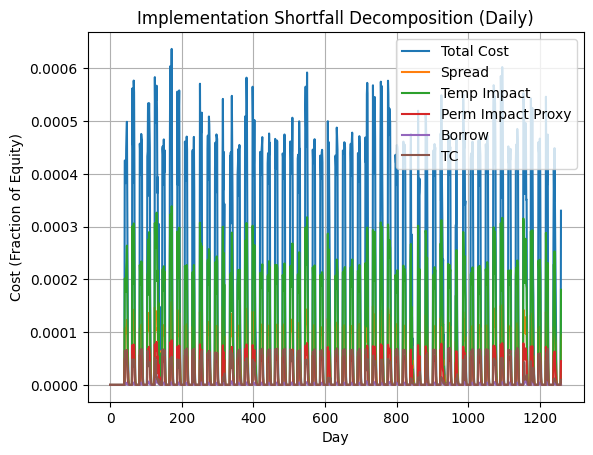

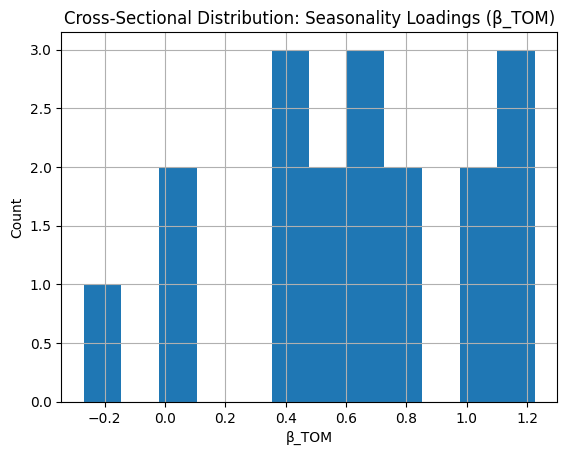

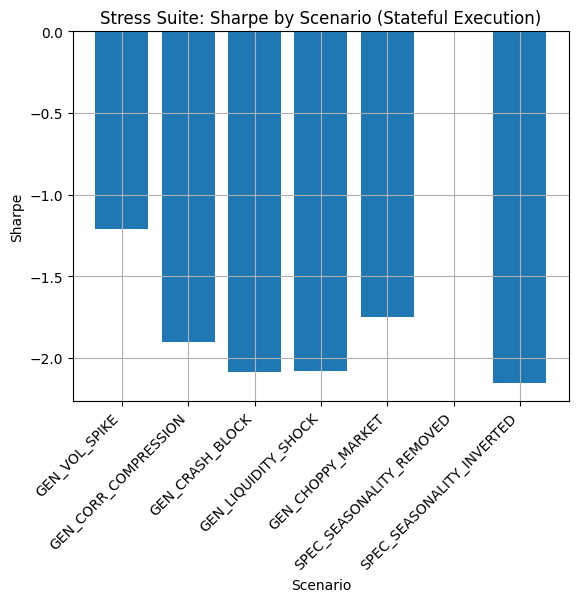

In [32]:


# Equity curve
plt.figure()
plt.plot(equity)
plt.title("Equity Curve (Net, Stateful Execution)")
plt.xlabel("Day")
plt.ylabel("Equity")
plt.grid(True)

# Drawdown
plt.figure()
plt.plot(drawdown)
plt.title("Drawdown (Net)")
plt.xlabel("Day")
plt.ylabel("Drawdown")
plt.grid(True)

# Rolling Sharpe
plt.figure()
plt.plot(roll_sharpe)
plt.title(f"Rolling Sharpe (Net, {CONFIG['rolling_window']}-day)")
plt.xlabel("Day")
plt.ylabel("Sharpe")
plt.grid(True)

# TOM flag + signal dispersion
plt.figure()
plt.plot(tom_flag, label="TOM Window (0/1)")
plt.plot(signal_disp, label="Signal Dispersion (σ_z)")
plt.title("TOM Window + Signal Dispersion")
plt.xlabel("Day")
plt.legend()
plt.grid(True)

# Rolling IC
plt.figure()
plt.plot(rolling_ic)
plt.title(f"Rolling IC (TOM days, {CONFIG['rolling_window']}-day)")
plt.xlabel("Day")
plt.ylabel("IC")
plt.grid(True)

# Attribution cumulative
cum_alpha = []
cum_beta = []
a = 0.0
b = 0.0
for t in range(n_days):
    a += alpha_component[t]
    b += beta_component[t]
    cum_alpha.append(a)
    cum_beta.append(b)
plt.figure()
plt.plot(cum_alpha, label="Cumulative Alpha Component")
plt.plot(cum_beta, label="Cumulative Beta Component")
plt.title("Cumulative Attribution: Alpha vs Beta (Net Returns)")
plt.xlabel("Day")
plt.ylabel("Cumulative Contribution (Additive)")
plt.legend()
plt.grid(True)

# Turnover: desired vs executed
plt.figure()
plt.plot(desired_turnover, label="Desired Turnover")
plt.plot(turnover, label="Executed Turnover")
plt.title("Turnover: Desired vs Executed (Capacity Constrained)")
plt.xlabel("Day")
plt.ylabel("Gross Weight Change")
plt.legend()
plt.grid(True)

# Fill ratio + open order gross
plt.figure()
plt.plot(fill_ratio, label="Fill Ratio")
plt.plot(open_order_gross, label="Open Order Gross")
plt.title("Execution Quality: Fill Ratio + Execution Debt")
plt.xlabel("Day")
plt.legend()
plt.grid(True)

# Cost decomposition
plt.figure()
plt.plot(total_cost, label="Total Cost")
plt.plot(spread_cost, label="Spread")
plt.plot(temp_impact_cost, label="Temp Impact")
plt.plot(perm_impact_cost, label="Perm Impact Proxy")
plt.plot(borrow_cost, label="Borrow")
plt.plot(tc_cost, label="TC")
plt.title("Implementation Shortfall Decomposition (Daily)")
plt.xlabel("Day")
plt.ylabel("Cost (Fraction of Equity)")
plt.legend()
plt.grid(True)

# Cross-sectional distribution: seasonality betas
plt.figure()
plt.hist(seasonality_beta, bins=12)
plt.title("Cross-Sectional Distribution: Seasonality Loadings (β_TOM)")
plt.xlabel("β_TOM")
plt.ylabel("Count")
plt.grid(True)

# Stress Sharpe comparison
labels = list(stress_results.keys())
vals = [stress_results[k]["sharpe"] for k in labels]
plt.figure()
plt.bar(range(len(labels)), vals)
plt.title("Stress Suite: Sharpe by Scenario (Stateful Execution)")
plt.xlabel("Scenario")
plt.ylabel("Sharpe")
plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
plt.grid(True)

plt.show()


##10.AUDIT BUNDLE

###10.1.OVERVIEW



This cell finalizes the notebook as a regulator-ready laboratory by generating the maximum audit bundle. It runs two institutional robustness exercises that go beyond single-path backtests: a parameter sensitivity grid and a Monte Carlo robustness envelope. For a turn-of-the-month strategy, these exercises are not optional because the edge is temporally localized and therefore sensitive to small specification changes and residual noise. The sensitivity grid varies key hyperparameters: the number of first days included in the TOM window, the breadth of the top-k selection bucket, and whether the posture is long–short or long-only. Each grid point reruns the full stateful engine, preserving execution realism. This is crucial because parameter sensitivity that ignores partial fills and costs is misleading; the notebook ensures that feasibility and implementation shortfall are part of the sensitivity surface.

The Monte Carlo envelope then perturbs the residual channel while preserving the structural regime process and seasonality channel. The perturbation is implemented as a day-level shock that scales residuals, producing alternative realizations that test how quickly noise can overwhelm a seasonal drift. The outputs are not used to claim probability of success; they are used to build intuition about robustness and dispersion of terminal outcomes under controlled structural assumptions. The envelope reports percentile outcomes for terminal equity and includes execution feasibility statistics such as average fill ratios and average total costs.

A key governance move in this cell is artifact integrity. The notebook hashes every produced artifact and stores a registry of sha256 checksums with byte sizes. It then computes a master bundle hash derived from the stable representation of that registry. This creates a tamper-evident audit layer: if any artifact is modified, the hash registry and master hash will fail to match. The cell writes an audit index that lists root governance files, deliverables, and key outputs so that an external reviewer can quickly identify what the run produced and how to verify integrity.

Finally, the cell bundles all artifacts into a single zip file. This zip is the “deliverable object” of the laboratory: a reproducible package that contains configuration identity (run_id and config hash), diagnostics, stress results, robustness envelopes, model risk scoring, governance maturity classification, and review checklists. Importantly, all artifacts preserve the explicit “Not verified” status and separate facts from assumptions. This reinforces the notebook’s educational stance: the system produces structured evidence, not conclusions. A human reviewer must validate assumptions, calibrate scenario severity, and decide whether any deployment classification is appropriate.

The learning objective is to teach the final step of institutional research: the transformation of an experiment into an auditable record. In a turn-of-the-month context, this matters because seasonal strategies are especially prone to casual, non-reproducible analysis. This cell enforces the opposite: deterministic replay, explicit sensitivity surfaces, robustness envelopes, and tamper-evident packaging. That is what makes the notebook a laboratory rather than a backtest.


###10.2.CODE AND IMPLEMENTATION

In [36]:

# ----------------------------
# Sensitivity Grid (engine-compatible; rebuild TOM flag per setting)
# ----------------------------
def rebuild_tom_flag(first_k_days, last_day_included=True):
    tf = [0 for _ in range(n_days)]
    Kk = int(first_k_days)
    for t in range(n_days):
        if last_day_included and is_month_end[t]:
            tf[t] = 1
        if month_day[t] < Kk and not is_month_end[t]:
            tf[t] = 1
    return tf

def run_sensitivity_grid():
    grid = CONFIG["sensitivity_grid"]
    results = []
    original = {
        "tom_first_k_days": CONFIG["tom_first_k_days"],
        "top_k": CONFIG["top_k"],
        "long_short": CONFIG["long_short"],
        "max_gross_leverage": CONFIG["max_gross_leverage"],
        "max_name_weight": CONFIG["max_name_weight"],
    }

    for k_days in grid["tom_first_k_days"]:
        for topk in grid["top_k"]:
            for ls in grid["long_short"]:
                # temporarily set portfolio hyperparameters
                CONFIG["tom_first_k_days"] = int(k_days)
                CONFIG["top_k"] = int(topk)
                CONFIG["long_short"] = bool(ls)

                tf = rebuild_tom_flag(CONFIG["tom_first_k_days"], CONFIG["tom_last_day_included"])

                out = run_backtest_engine(asset_ret, mkt_ret, liq, tf)

                ret_s = out["ret"]
                dd_s = out["drawdown"]

                results.append({
                    "tom_first_k_days": int(k_days),
                    "top_k": int(topk),
                    "long_short": bool(ls),

                    "sharpe": sharpe(ret_s, CONFIG["risk_free_daily"]),
                    "ann_return": annualize_return(ret_s),
                    "ann_vol": annualize_vol(ret_s),
                    "max_drawdown": max_drawdown(dd_s),

                    "avg_desired_turnover": mean(out["desired_turnover"]),
                    "avg_executed_turnover": mean(out["executed_turnover"]),
                    "avg_fill_ratio": mean(out["fill_ratio"]),
                    "avg_open_order_gross": mean(out["open_order_gross"]),
                    "avg_total_cost": mean(out["total_cost"]),
                })

    # restore
    CONFIG["tom_first_k_days"] = original["tom_first_k_days"]
    CONFIG["top_k"] = original["top_k"]
    CONFIG["long_short"] = original["long_short"]
    CONFIG["max_gross_leverage"] = original["max_gross_leverage"]
    CONFIG["max_name_weight"] = original["max_name_weight"]

    return results

sens = run_sensitivity_grid()
sens_payload = base_json_envelope()
sens_payload["analysis"] = {
    "run_id": run_id,
    "engine": "stateful_partial_fill_sliced",
    "grid": CONFIG["sensitivity_grid"],
    "note": "Sensitivity reruns use identical synthetic market; only strategy hyperparameters vary."
}
sens_payload["outputs"] = {"results": sens}
write_json(os.path.join(DELIV_DIR, "parameter_sensitivity.json"), sens_payload)

# ----------------------------
# Monte Carlo Robustness Envelope (>=200) — residual perturbations
# NOTE: deterministic because PRNG seeded in Cell 2 and continued consistently.
# ----------------------------
def run_monte_carlo_envelope(n_sims):
    sims = []
    for s in range(int(n_sims)):
        # Perturb residuals with a day-level shock; this preserves cross-sectional structure
        ar_mc = [[0.0 for _ in range(n_assets)] for _ in range(n_days)]
        for t in range(n_days):
            zt = random.gauss(0.0, 1.0)
            for i in range(n_assets):
                ar_mc[t][i] = asset_ret[t][i] + (float(CONFIG["mc_noise_scale"]) * zt * residual[t][i])

        out = run_backtest_engine(ar_mc, mkt_ret, liq, tom_flag)

        ret_s = out["ret"]
        dd_s = out["drawdown"]
        terminal = out["equity"][-1]

        sims.append({
            "sim": s,
            "terminal_equity": terminal,
            "sharpe": sharpe(ret_s, CONFIG["risk_free_daily"]),
            "ann_return": annualize_return(ret_s),
            "ann_vol": annualize_vol(ret_s),
            "max_drawdown": max_drawdown(dd_s),
            "avg_fill_ratio": mean(out["fill_ratio"]),
            "avg_total_cost": mean(out["total_cost"]),
        })
    return sims

mc = run_monte_carlo_envelope(CONFIG["monte_carlo_sims"])
terminals = [x["terminal_equity"] for x in mc]
terminals_sorted = sorted(terminals)
p05 = terminals_sorted[int(0.05 * (len(terminals_sorted) - 1))]
p50 = terminals_sorted[int(0.50 * (len(terminals_sorted) - 1))]
p95 = terminals_sorted[int(0.95 * (len(terminals_sorted) - 1))]

mc_payload = base_json_envelope()
mc_payload["analysis"] = {
    "run_id": run_id,
    "engine": "stateful_partial_fill_sliced",
    "n_sims": CONFIG["monte_carlo_sims"],
    "perturbation": "Additive residual perturbation with day shock zt, scaled by mc_noise_scale; deterministic under seed."
}
mc_payload["outputs"] = {
    "summary": {"p05_terminal": p05, "p50_terminal": p50, "p95_terminal": p95},
    "simulations": mc
}
write_json(os.path.join(DELIV_DIR, "monte_carlo_envelope.json"), mc_payload)

# ----------------------------
# Consolidated Fragility Snapshot (re-state key outputs into a single file)
# ----------------------------
frag_snap = base_json_envelope()
frag_snap["analysis"] = {"run_id": run_id, "engine": "stateful_partial_fill_sliced"}
frag_snap["outputs"] = {
    "base_metrics": metrics,
    "stress_degradations_keys": list(stress_results.keys()),
    "model_risk_tier": model_risk_tier,
    "fragility_score": fragility_score,
    "deployment_status": deployment,
    "mc_terminal_summary": {"p05": p05, "p50": p50, "p95": p95},
}
write_json(os.path.join(DELIV_DIR, "fragility_analysis.json"), frag_snap)

# ----------------------------
# Review checklist (ensure present; overwrite for completeness)
# ----------------------------
checklist = base_json_envelope()
checklist["analysis"] = {"run_id": run_id, "engine": "stateful_partial_fill_sliced"}
checklist["outputs"] = {
    "required_reviews": [
        {"item": "Validate synthetic regime generator + TOM injection", "owner": "Independent reviewer", "status": "OPEN"},
        {"item": "Validate order/capacity/partial-fill model assumptions", "owner": "Execution specialist", "status": "OPEN"},
        {"item": "Validate borrow fee model + locate/buy-in risks (if extended)", "owner": "Prime brokerage liaison", "status": "OPEN"},
        {"item": "Validate risk budget (target vol) and drawdown policy", "owner": "Risk manager", "status": "OPEN"},
        {"item": "Validate scenario design and severity in stress suite", "owner": "Model risk committee", "status": "OPEN"},
        {"item": "Validate deployment classification policy thresholds", "owner": "Governance lead", "status": "OPEN"},
    ],
    "signoff_required": True,
    "verification_status_required": "Not verified"
}
write_json(os.path.join(DELIV_DIR, "review_checklist.json"), checklist)

# ----------------------------
# Artifact Hash Registry + Audit Index + Bundle Zip (tamper-evident)
# ----------------------------
def sha256_bytes(b: bytes) -> str:
    return hashlib.sha256(b).hexdigest()

def sha256_str(s: str) -> str:
    return sha256_bytes(s.encode("utf-8"))

def stable_dumps(obj) -> str:
    return json.dumps(obj, sort_keys=True, separators=(",", ":"), ensure_ascii=False)

def list_files_for_hashing():
    files = []
    # root governance artifacts
    for fn in ["run_manifest.json", "prompts_log.jsonl", "risk_log.json"]:
        p = os.path.join(ROOT, fn)
        if os.path.exists(p):
            files.append(p)
    # deliverables
    for fn in os.listdir(DELIV_DIR):
        p = os.path.join(DELIV_DIR, fn)
        if os.path.isfile(p):
            files.append(p)
    files.sort()
    return files

hash_registry = base_json_envelope()
hash_registry["analysis"] = {"run_id": run_id, "hash_alg": "sha256"}
hash_registry["outputs"] = {"files": []}

for p in list_files_for_hashing():
    with open(p, "rb") as f:
        b = f.read()
    hash_registry["outputs"]["files"].append({
        "path": os.path.relpath(p, ROOT),
        "sha256": sha256_bytes(b),
        "bytes": len(b)
    })

write_json(os.path.join(DELIV_DIR, "artifact_hash_registry.json"), hash_registry)

master_bundle_hash = sha256_str(stable_dumps(hash_registry["outputs"]["files"]))

audit_index = base_json_envelope()
audit_index["analysis"] = {
    "run_id": run_id,
    "config_hash": config_hash,
    "engine": "stateful_partial_fill_sliced",
    "master_bundle_hash": master_bundle_hash,
    "integrity": "Tamper-evident via sha256 registry + master hash"
}
audit_index["outputs"] = {
    "root_files": ["run_manifest.json", "prompts_log.jsonl", "risk_log.json"],
    "deliverables_dir": "deliverables/",
    "key_outputs": [
        "metrics_summary.json",
        "diagnostics.json",
        "equity_curve.json",
        "positions.json",
        "stress_test_results.json",
        "parameter_sensitivity.json",
        "monte_carlo_envelope.json",
        "fragility_analysis.json",
        "model_risk_score.json",
        "governance_maturity.json",
        "deployment_status.json",
        "signal_matrix.json",
        "execution_audit.json",
        "reproducibility_report.json",
        "artifact_hash_registry.json",
        "audit_index.json",
        "review_checklist.json"
    ]
}
write_json(os.path.join(DELIV_DIR, "audit_index.json"), audit_index)

# ----------------------------
# Final bundle zip
# ----------------------------
bundle_path = os.path.join(ROOT, "lab_bundle.zip")
with zipfile.ZipFile(bundle_path, "w", compression=zipfile.ZIP_DEFLATED) as z:
    for fn in ["run_manifest.json", "prompts_log.jsonl", "risk_log.json"]:
        p = os.path.join(ROOT, fn)
        if os.path.exists(p):
            z.write(p, arcname=fn)
    for fn in os.listdir(DELIV_DIR):
        p = os.path.join(DELIV_DIR, fn)
        if os.path.isfile(p):
            z.write(p, arcname=os.path.join("deliverables", fn))

print("Bundle created:", os.path.basename(bundle_path))
print("run_id:", run_id)
print("config_hash:", config_hash)
print("master_bundle_hash:", master_bundle_hash)


Bundle created: lab_bundle.zip
run_id: 5499554c8c924231
config_hash: 9a4c816085d65946e1429a14
master_bundle_hash: a388a4003a3ebf6ed4ce18b016459d72d09f2777855d178f16c7ee3f41850f81


##11.CONCLUSION

**Conclusion — What This Turn-of-the-Month Laboratory Teaches**

The turn-of-the-month seasonality laboratory is best understood as an instructional device for professional intuition: it compresses the essence of institutional trading into a narrow temporal window where constraints bind quickly and where naive backtests are maximally misleading. By the end of the notebook, the reader should not be thinking primarily about “TOM alpha.” The durable lesson is broader: any strategy whose edge is concentrated in time is structurally exposed to execution and regime fragility, and any research process that ignores that interaction is incomplete.

One structural insight is that “seasonality” is a mechanism, not a statistic. In the notebook’s synthetic market, month boundaries matter because they proxy a flow process that changes the short-run clearing price of risk. This is the correct causal ordering. A calendar feature does not create return patterns by itself; it coordinates behavior—contributions, rebalancing, reporting, and risk targeting—so that a predictable imbalance can arise. When the notebook assigns each asset a seasonality loading, it makes this imbalance cross-sectional: some instruments are structurally more sensitive to the flow. This transforms a time-series claim into a factor-like mapping, which can be examined with the same scientific discipline used for equity factors: dispersion, information coefficients, and regime dependence.

A second insight is that the relevant surface is an execution surface. In many mechanism-first laboratories, the surface is a curve—yields by tenor, spreads by maturity, implied volatility by strike. Here the surface is the mapping from desired turnover to implementation shortfall, conditioned on liquidity, volatility, and regime. This surface is not an optional “cost overlay.” It is the primary channel through which a seasonal hypothesis survives or fails. The notebook’s stateful engine makes this visible by introducing partial fills, slicing, capacity limits, and open-order backlogs. These features are not embellishments; they replicate the practical reality that the portfolio you want and the portfolio you can achieve are not the same object.

The fragility modes become clearer under this lens. The first fragility mode is hypothesis fragility: if the seasonal drift is removed or inverted, the strategy’s conceptual foundation collapses. The notebook makes this explicit through strategy-specific stress tests that directly attack the seasonality channel. A second fragility mode is regime fragility: even if the seasonal drift exists in calm regimes, it can be overwhelmed by crash dynamics, correlation compression, and liquidity deterioration. The crash-block stress illustrates how a short-window strategy can be punished by the market precisely when its turnover needs are highest. A third fragility mode is execution fragility: liquidity shocks widen spreads, increase impact convexity, degrade fill ratios, and create execution debt that forces the policy into unintended exposures. In the laboratory, this manifests as worsening fill ratios, higher costs, and increased drawdown amplification in stressed scenarios.

A particularly important professional intuition is that execution dominates theory in time-local strategies because there is no time to “work the order” slowly. If an edge is only present for a few days, the agent must enter and exit quickly. That requirement is in direct tension with impact minimization, which prefers patient execution. The notebook makes this tension measurable: desired turnover and executed turnover diverge, fill ratios fall in stress, and the open-order backlog becomes an endogenous risk factor. In real practice, this is where many seasonal strategies break—not because the signal is false, but because the implied trading program is not feasible at meaningful scale.

The conclusion also reinforces why governance is essential for mechanism-first learning. Seasonality invites overconfidence because it is easy to describe. But easy descriptions are precisely the ones most likely to hide untested assumptions. The notebook’s governance engine—stress testing, parameter sensitivity, Monte Carlo envelopes, and explicit model risk tiering—forces the strategy to be treated like a model that can fail. The fragility score is not a badge of success or failure; it is a structured summary of how sensitive the policy is to the very channels that matter in institutional environments: regime shifts, liquidity cliffs, and execution nonlinearities.

The most productive way to iterate experimentally is to treat the notebook as a controlled perturbation platform. A professional researcher should vary one structural dimension at a time and interpret results causally. Increasing impact convexity tests capacity sensitivity. Tightening participation constraints tests whether the edge is implementable at lower footprint. Changing regime persistence tests whether the strategy relies on rare calm intervals. Collapsing seasonality dispersion tests whether cross-sectional selection is genuinely necessary or whether the effect is mostly market-wide. Modifying the borrow fee process tests whether long–short neutrality is a realistic posture under stress. None of these experiments are “optimization.” They are structural probes that build intuition about constraint bindingness.

Finally, the laboratory clarifies the correct professional stance toward results: humility and specificity. A seasonal strategy that appears attractive in a frictionless toy backtest is not a deployable system. A seasonal strategy that remains stable under stress tests is still not a deployable system. The notebook is a learning instrument that helps the practitioner reason about mechanisms: how flow-driven effects can express themselves, how regimes reshape both returns and implementation, and how execution transforms paper edges into realized outcomes. The discipline it teaches—mechanism-first modeling plus governance-first evaluation—is transferable far beyond turn-of-the-month. It applies to any strategy whose viability depends on the joint behavior of signal, market state, and microstructure constraints.

The reader should therefore leave with two sharpened intuitions. First, edges that are temporally concentrated are structurally capacity-limited and thus governed by microstructure. Second, research that does not treat execution as an endogenous mechanism is incomplete. The notebook does not promise performance; it offers a controlled environment where the practitioner can learn why and how performance claims fail. That is the core value of a mechanism-first laboratory.
